<a href="https://colab.research.google.com/github/saitejadl/Machine_Learning_Projects/blob/main/Merchant%20Fraudster%20Detection%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

Classification Problem - Predict if the Merchant is Fraudster
Contents
- I. Problem Description..............................................................................................................................
- II. The datasets are provided as cited below............................................................................................
- III. Tasks: ...................................................................................................................................................
 - Main task : ............................................................................................................................................
 - Visualization Tasks &
 -others:................................................................................................................
- IV. Evaluation Metric:..............................................................................................................................


<h2>Classification Problem - Predict if the Merchant is Fraudster</h2>

- I.Problem Description
Predict if the Merchant is Fraudster or not for an e-commerce client
‘XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has
the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such
schemes leave customers duped, and place both legitimate merchants and the company itself in a constant
battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud
investigation. It's a well-known problem both to the company and to merchants, which they say hasn't
effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent
merchants using technology.
You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency(yes/no)
based on the quantitative and qualitative features provided in the dataset while answering other questions too
cited below.
- II.The datasets are provided as cited below:
Target attribute: "fraudster" (yes – 1, no – 0)
Train:
• train_merchant_data.csv : Merchant Information
• train_order_data.csv : Order Information
• train.csv : Target Label Information
Test:
• test_merchant_data.csv : Merchant Information
• test_order_data.csv : Order Information
• test.csv : Target is not available as it is to be predicted
➔ ip_boundaries_countries.csv : IP addresses boundaries for each country
(common for both train and test)
All Attributes names are self-explanatory.
Classification Problem - Predict if the Merchant is Fraudster

- III.Tasks:
Model Building:
You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency based
on the quantitative and qualitative features provided in the datasets. You may derive new features from the
existing features and also from the domain knowledge, which may help in improving the model efficiency.
Visualization Tasks:
Exploratory Data Analysis using visualizations in R Notebook or Jupiter notebook format. (all train data to be
used for this task)
• List down the insights/patterns observed from the visualizations
• Explain the impact of most important attributes on target attribute observed from the
visualizations.
Observations:
Is there any overfitting or underfitting problem? If yes, how do you address it?
- IV. Evaluation Metric:
• Consider ‘F1-score’ of the fraudulent class as the error metric for classification task to tune the
model and for submissions in the tool.

*  *  


---


*  *  


# Importing and loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append("/content/drive/MyDrive/Functions")               #Adding my file folder path to system path
from ml_functions import *                                        #Importing Customised functions python script

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import datetime as dt
from ipaddress import *

In [ ]:
#To handle ipadress we import netaddr
!pip install netaddr -qq
from netaddr import *
import ipaddress

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train1 = pd.read_csv("/content/drive/MyDrive/Mith/Training data/train-1561627878332.csv")
train_merchant = pd.read_csv("/content/drive/MyDrive/Mith/Training data/train_merchant_data-1561627820784.csv")
train_order = pd.read_csv("/content/drive/MyDrive/Mith/Training data/train_order_data-1561627847149.csv")
ip_boundaries = pd.read_csv("/content/drive/MyDrive/Mith/IP boundaries data/ip_boundaries_countries-1561628631121.csv")

In [ ]:
print(f'{" train1 ":~^50}')
display(train1.sample(5))
print(f'{" train_merchant ":~^50}')
display(train_merchant.sample(5))
print(f'{" train_order ":~^50}')
display(train_order.sample(5))
print(f'{" ip_boundaries ":~^50}')
display(ip_boundaries.sample(5))

~~~~~~~~~~~~~~~~~~~~~ train1 ~~~~~~~~~~~~~~~~~~~~~


,Merchant_ID,Fraudster
14512,310850,0
21018,278829,0
51033,324600,1
28892,98013,0
49386,388168,0


~~~~~~~~~~~~~~~~~ train_merchant ~~~~~~~~~~~~~~~~~


,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
25345,1746213,328838,2018-08-17 22:05:14,INAJIKVMMIMNN,F,28,245.137.203.190
17308,1746213,109587,2018-04-30 19:17:05,WQFCMGALLGWGF,F,25,143.60.141.236
16056,1746213,16654,2018-01-17 09:39:10,DXTKATCUCESQM,F,29,10.145.194.97
30725,1746213,242023,2018-03-10 05:59:40,OPWQQVQQGPXMZ,M,32,154.69.135.160
6563,1746213,203138,2018-05-12 11:20:24,LLEKSHUWECLUE,F,42,5.49.247.42


~~~~~~~~~~~~~~~~~~ train_order ~~~~~~~~~~~~~~~~~~~


,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
26424,114107,3f4809645f3a,2018-04-14 11:06:12,35,Ads,E-wallet,365390
25738,129402,b4b64d0a8412,2018-01-28 02:15:06,25,SEO,Credit Card,206005
20851,160558,b8462d56fdab,2018-03-26 17:09:16,48,Ads,E-wallet,385096
8645,114720,9288137d026f,2018-09-08 20:50:36,130,SEO,Credit Card,347093
12705,128394,ba50a1e92776,2018-09-26 06:33:47,48,SEO,Internet Banking,151099


~~~~~~~~~~~~~~~~~ ip_boundaries ~~~~~~~~~~~~~~~~~~


,lower_bound_ip_address,upper_bound_ip_address,country
45215,161.22.64.0,161.22.127.255,French Guiana
12296,74.114.132.0,74.114.135.255,United States
67057,192.107.36.0,192.107.36.255,United States
121675,204.75.137.0,204.75.137.255,United States
83443,194.40.0.0,194.40.127.255,Switzerland


Merging Data

In [ ]:
#Merging data on common columns
xyz_train = train1.merge   (train_merchant.merge   (train_order,on='Merchant_ID',how='inner')   ,on='Merchant_ID',how='inner')

# Train Data Understanding

In [ ]:
info_shape(xyz_train)

shape:(54213, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Merchant_ID                 54213 non-null  int64 
 1   Fraudster                   54213 non-null  int64 
 2   Ecommerce_Provider_ID       54213 non-null  int64 
 3   Merchant_Registration_Date  54213 non-null  object
 4   Registered_Device_ID        54213 non-null  object
 5   Gender                      54213 non-null  object
 6   Age                         54213 non-null  int64 
 7   IP_Address                  54213 non-null  object
 8   Customer_ID                 54213 non-null  int64 
 9   Order_ID                    54213 non-null  object
 10  Date_of_Order               54213 non-null  object
 11  Order_Value_USD             54213 non-null  int64 
 12  Order_Source                54213 non-null  object
 13  Order_Payment_Method        

[None]

In [ ]:
xyz_train[['Age','Order_Value_USD']].describe()

,Age,Order_Value_USD
count,54213.000000,54213.000000
mean,33.122240,92.230240
std,8.630091,45.673263
min,18.000000,22.000000
25%,27.000000,55.000000
50%,32.000000,88.000000
75%,39.000000,122.000000
max,72.000000,385.000000


* Most of the people having age around 33 are there in the data
* Most of the transactions are being around 92.230240

In [ ]:
null_unique(xyz_train)

,unique values,unique values %,null values,null values %
Merchant_ID,54213,100.000000,0,0.0
Fraudster,2,0.003689,0,0.0
Ecommerce_Provider_ID,1,0.001845,0,0.0
Merchant_Registration_Date,54213,100.000000,0,0.0
Registered_Device_ID,51291,94.610149,0,0.0
Gender,2,0.003689,0,0.0
Age,53,0.097763,0,0.0
IP_Address,52028,95.969601,0,0.0
Customer_ID,34081,62.864995,0,0.0
Order_ID,54213,100.000000,0,0.0


* Most of the id columns are highly cardinal so we can drop them

In [ ]:
# separating columns to be drop
Ids = xyz_train[['Merchant_ID','Ecommerce_Provider_ID','Registered_Device_ID','Customer_ID','Order_ID']]
#Droping the columns seperated
xyz_train.drop(columns=Ids,inplace=True,axis=1)
Ids.sample(5)

,Merchant_ID,Ecommerce_Provider_ID,Registered_Device_ID,Customer_ID,Order_ID
19213,394017,1746213,MWMPMSWZPCXWJ,160754,25c509dc1f15
14833,290045,1746213,JSDZKDHATZCCG,150956,8d6a7f3cc613
10474,315669,1746213,CXSHKSBNWBZDZ,123192,682d5a819b6e
23794,148410,1746213,UOYCQNZUPYFNP,153641,51cab96ec3f8
44583,359071,1746213,KHADEGVRWJEMA,141075,4e90d968eca6


# Train dtypes Casting

In [ ]:
# Listing columns to the corresponding variable name which are to be converted to their appropriate datatypes
cat = ['Fraudster','Gender','Order_Source','Order_Payment_Method']
num = ['Age','Order_Value_USD']
da_ti = ["Merchant_Registration_Date","Date_of_Order"]
# Converting columns to proper datatypes by analysing the values
type_cast(xyz_train,cat,num,da_ti)
ip_ints = xyz_train['IP_Address'].apply(IPv4Address).apply(int)              #Converting IP_Address column to IPv4Adress then to integers

In [ ]:
xyz_train.dtypes

Fraudster                           category
Merchant_Registration_Date    datetime64[ns]
Gender                              category
Age                                    int64
IP_Address                            object
Date_of_Order                 datetime64[ns]
Order_Value_USD                        int64
Order_Source                        category
Order_Payment_Method                category
dtype: object

## IP boundaries dtypes casting

In [ ]:
ip_boundaries['lower_bound_ip_address'] = ip_boundaries['lower_bound_ip_address'].apply(IPv4Address).apply(int)
ip_boundaries['upper_bound_ip_address'] = ip_boundaries['upper_bound_ip_address'].apply(IPv4Address).apply(int)
ip_boundaries['country'] = ip_boundaries['country'].astype('category')
ip_boundaries.dtypes

lower_bound_ip_address       int64
upper_bound_ip_address       int64
country                   category
dtype: object

# Fetching Countries from ip_boundaries dataset based on train dataset IP_Address column

In [ ]:
# def ip_to_country(x):
#   for i,j,k in zip(ip_boundaries['lower_bound_ip_address'],ip_boundaries["upper_bound_ip_address"],ip_boundaries["country"]):
#     if(x>=i and x<=j):
#       return k

In [ ]:
# ip_countries=ip_ints.apply(ip_to_country)
# ip_countries=ip_countries.fillna("unknown")

In [ ]:
# ip_countries.to_csv('/content/drive/MyDrive/Mith/IP boundaries data/countries.csv',index=False)

In [ ]:
countries = pd.read_csv("/content/drive/MyDrive/Mith/IP boundaries data/countries.csv")
xyz_train['countries'] = countries['IP_Address']
# xyz_train['countries'] = ip_countries
xyz_train

,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries
0,0,2018-07-01 06:43:23,F,42,157.217.17.33,2018-10-29 17:58:25,205,Direct,Credit Card,United States
1,1,2018-01-18 01:10:42,M,42,46.8.62.247,2018-03-24 20:15:57,88,Ads,Cash On Delivery,Russian Federation
2,1,2018-07-16 07:56:34,M,19,222.110.0.90,2018-09-19 15:13:54,100,Direct,Credit Card,Korea Republic of
3,1,2018-04-28 17:08:09,F,35,104.242.92.50,2018-05-27 23:24:42,60,Direct,Debit Card,Canada
4,1,2018-01-09 00:26:19,F,27,175.104.225.24,2018-01-11 00:26:20,88,Ads,E-wallet,Japan
...,...,...,...,...,...,...,...,...,...,...
54208,0,2018-07-22 14:39:10,M,22,221.89.30.218,2018-08-27 07:27:23,98,Ads,Internet Banking,Japan
54209,0,2018-02-20 10:55:56,M,33,32.158.181.72,2018-04-21 09:30:29,60,SEO,Credit Card,United States
54210,0,2018-04-12 15:14:21,M,29,237.66.206.59,2018-07-16 05:57:39,90,SEO,Internet Banking,unknown
54211,0,2018-06-02 19:21:25,M,28,121.74.41.104,2018-06-14 13:03:08,120,Ads,Debit Card,New Zealand


# Country

In [ ]:
country_count = pd.DataFrame(xyz_train['countries'].value_counts())
country_count.reset_index(inplace = True)
country_count.rename(columns = {'index':'countries','countries':"count"},inplace = True)
country_count

,countries,count
0,United States,20963
1,unknown,7811
2,China,4284
3,Japan,2641
4,United Kingdom,1610
...,...,...
105,Libyan Arab Jamahiriya,2
106,Cote D'ivoire,2
107,Malawi,1
108,Turkmenistan,1


In [ ]:
xyz_train['countries_count'] = xyz_train['countries'].groupby(xyz_train['countries']).transform('count')
xyz_train

,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count
0,0,2018-07-01 06:43:23,F,42,157.217.17.33,2018-10-29 17:58:25,205,Direct,Credit Card,United States,20963
1,1,2018-01-18 01:10:42,M,42,46.8.62.247,2018-03-24 20:15:57,88,Ads,Cash On Delivery,Russian Federation,597
2,1,2018-07-16 07:56:34,M,19,222.110.0.90,2018-09-19 15:13:54,100,Direct,Credit Card,Korea Republic of,1429
3,1,2018-04-28 17:08:09,F,35,104.242.92.50,2018-05-27 23:24:42,60,Direct,Debit Card,Canada,1096
4,1,2018-01-09 00:26:19,F,27,175.104.225.24,2018-01-11 00:26:20,88,Ads,E-wallet,Japan,2641
...,...,...,...,...,...,...,...,...,...,...,...
54208,0,2018-07-22 14:39:10,M,22,221.89.30.218,2018-08-27 07:27:23,98,Ads,Internet Banking,Japan,2641
54209,0,2018-02-20 10:55:56,M,33,32.158.181.72,2018-04-21 09:30:29,60,SEO,Credit Card,United States,20963
54210,0,2018-04-12 15:14:21,M,29,237.66.206.59,2018-07-16 05:57:39,90,SEO,Internet Banking,unknown,7811
54211,0,2018-06-02 19:21:25,M,28,121.74.41.104,2018-06-14 13:03:08,120,Ads,Debit Card,New Zealand,110


In [ ]:
# p_fraud_countries = list(fraud_country_count[fraud_country_count['fraudcount']>50]["countries"].values)
# def labelise(x):
#   """
#   input   : values
#   return  : potential Fraud Country if value is in p_fraud_countries
#             Non Potential Fraud Country if vale not in p_fraud_countries
#   """
#   if(x in p_fraud_countries):
#     return 'potential Fraud Country'
#   else:
#     return 'Non Potential Fraud Country'
# xyz_train["countries"] = xyz_train["countries"].apply(labelise)

# IP_ADDRESS

In [ ]:
train_ip_counts = xyz_train.IP_Address.value_counts()
train_ip = pd.DataFrame(train_ip_counts)
train_ip.reset_index(inplace = True)
train_ip.rename(columns={'index':'IP_Address','IP_Address':"ip_counts"},inplace=True)
# train_ip['ip_counts'].value_counts()
train_ip

,IP_Address,ip_counts
0,91.161.239.48,9
1,115.241.135.193,9
2,66.198.113.69,9
3,175.104.225.24,9
4,136.189.191.154,9
...,...,...
52023,28.199.87.160,1
52024,56.191.181.40,1
52025,89.82.61.69,1
52026,59.161.251.223,1


In [ ]:
for i in range(1,xyz_train.IP_Address.value_counts().nunique()+1):
  print("No.of times repeated:", i, "     No.of ipaddress:", xyz_train.IP_Address.value_counts()[xyz_train.IP_Address.value_counts()==i].index.nunique())

No.of times repeated: 1      No.of ipaddress: 51353
No.of times repeated: 2      No.of ipaddress: 112
No.of times repeated: 3      No.of ipaddress: 143
No.of times repeated: 4      No.of ipaddress: 160
No.of times repeated: 5      No.of ipaddress: 104
No.of times repeated: 6      No.of ipaddress: 81
No.of times repeated: 7      No.of ipaddress: 48
No.of times repeated: 8      No.of ipaddress: 18
No.of times repeated: 9      No.of ipaddress: 9


In [ ]:
hunch_ips = train_ip[train_ip["ip_counts"]>1]['IP_Address'].values         # IP Adresses repeated morethan 1 time may have the high chance of fradulency
non_hunch_ips = train_ip[train_ip["ip_counts"]==1]['IP_Address'].values    # IP Adresses which appears only one time may have less chance of fradulency

In [ ]:
# xyz_train['Ip_Repeat']=xyz_train['IP_Address'].apply(lambda x : 1 if x in hunch_ips else 0)
xyz_train['Ip_count'] = xyz_train['IP_Address'].groupby(xyz_train['IP_Address']).transform('count')

In [ ]:
xyz_train['Ip_count'].value_counts()

1    51353
4      640
5      520
6      486
3      429
7      336
2      224
8      144
9       81
Name: Ip_count, dtype: int64

In [ ]:
xyz_train

,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
0,0,2018-07-01 06:43:23,F,42,157.217.17.33,2018-10-29 17:58:25,205,Direct,Credit Card,United States,20963,1
1,1,2018-01-18 01:10:42,M,42,46.8.62.247,2018-03-24 20:15:57,88,Ads,Cash On Delivery,Russian Federation,597,1
2,1,2018-07-16 07:56:34,M,19,222.110.0.90,2018-09-19 15:13:54,100,Direct,Credit Card,Korea Republic of,1429,1
3,1,2018-04-28 17:08:09,F,35,104.242.92.50,2018-05-27 23:24:42,60,Direct,Debit Card,Canada,1096,1
4,1,2018-01-09 00:26:19,F,27,175.104.225.24,2018-01-11 00:26:20,88,Ads,E-wallet,Japan,2641,9
...,...,...,...,...,...,...,...,...,...,...,...,...
54208,0,2018-07-22 14:39:10,M,22,221.89.30.218,2018-08-27 07:27:23,98,Ads,Internet Banking,Japan,2641,1
54209,0,2018-02-20 10:55:56,M,33,32.158.181.72,2018-04-21 09:30:29,60,SEO,Credit Card,United States,20963,1
54210,0,2018-04-12 15:14:21,M,29,237.66.206.59,2018-07-16 05:57:39,90,SEO,Internet Banking,unknown,7811,1
54211,0,2018-06-02 19:21:25,M,28,121.74.41.104,2018-06-14 13:03:08,120,Ads,Debit Card,New Zealand,110,1


# Merchant_Registration_Date
# Date_of_Order

**Analysing records of ip adress which are repeated for 9**

In [ ]:
ip_9_rep = xyz_train.IP_Address.value_counts()[xyz_train.IP_Address.value_counts()==9].index.to_list()

In [ ]:
for i in ip_9_rep:
  print(i)
  display(xyz_train[xyz_train['IP_Address']==i])  # This ip adress had repeated for 9 times
  print("_"*100)

91.161.239.48


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
10233,1,2018-01-02 15:47:57,F,31,91.161.239.48,2018-01-04 15:47:58,118,Direct,Credit Card,France,1138,9
14958,1,2018-01-02 15:47:52,F,31,91.161.239.48,2018-01-04 15:47:53,118,Direct,Credit Card,France,1138,9
18067,1,2018-01-02 15:47:54,F,31,91.161.239.48,2018-01-04 15:47:55,118,Direct,Credit Card,France,1138,9
30050,1,2018-01-02 15:47:49,F,31,91.161.239.48,2018-01-04 15:47:50,118,Direct,Credit Card,France,1138,9
31461,1,2018-01-02 15:48:00,F,31,91.161.239.48,2018-01-04 15:48:01,118,Direct,Credit Card,France,1138,9
37235,1,2018-01-02 15:47:59,F,31,91.161.239.48,2018-01-04 15:48:00,118,Direct,Credit Card,France,1138,9
37493,1,2018-01-02 15:47:53,F,31,91.161.239.48,2018-01-04 15:47:54,118,Direct,Credit Card,France,1138,9
51363,1,2018-01-02 15:47:51,F,31,91.161.239.48,2018-01-04 15:47:52,118,Direct,Credit Card,France,1138,9
53505,0,2018-01-02 15:47:48,F,31,91.161.239.48,2018-01-12 13:10:53,118,Direct,Credit Card,France,1138,9


____________________________________________________________________________________________________
115.241.135.193


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
1762,1,2018-01-12 19:35:48,F,31,115.241.135.193,2018-01-14 19:35:49,128,Ads,Credit Card,India,476,9
4030,0,2018-01-12 19:35:43,F,31,115.241.135.193,2018-04-09 11:16:08,128,Ads,Credit Card,India,476,9
10259,1,2018-01-12 19:35:53,F,31,115.241.135.193,2018-01-14 19:35:54,128,Ads,Credit Card,India,476,9
16552,1,2018-01-12 19:35:46,F,31,115.241.135.193,2018-01-14 19:35:47,128,Ads,Credit Card,India,476,9
22370,1,2018-01-12 19:35:50,F,31,115.241.135.193,2018-01-14 19:35:51,128,Ads,Credit Card,India,476,9
24078,1,2018-01-12 19:35:56,F,31,115.241.135.193,2018-01-14 19:35:57,128,Ads,Credit Card,India,476,9
44860,1,2018-01-12 19:35:55,F,31,115.241.135.193,2018-01-14 19:35:56,128,Ads,Credit Card,India,476,9
46811,1,2018-01-12 19:35:45,F,31,115.241.135.193,2018-01-14 19:35:46,128,Ads,Credit Card,India,476,9
49699,1,2018-01-12 19:35:47,F,31,115.241.135.193,2018-01-14 19:35:48,128,Ads,Credit Card,India,476,9


____________________________________________________________________________________________________
66.198.113.69


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
2184,1,2018-01-08 21:29:18,F,37,66.198.113.69,2018-01-10 21:29:19,62,Ads,Internet Banking,United States,20963,9
10293,1,2018-01-08 21:29:19,F,37,66.198.113.69,2018-01-10 21:29:20,62,Ads,Internet Banking,United States,20963,9
26957,1,2018-01-08 21:29:21,F,37,66.198.113.69,2018-01-10 21:29:22,62,Ads,Internet Banking,United States,20963,9
27462,1,2018-01-08 21:29:10,F,37,66.198.113.69,2018-01-10 21:29:11,62,Ads,Internet Banking,United States,20963,9
37424,1,2018-01-08 21:29:13,F,37,66.198.113.69,2018-01-10 21:29:14,62,Ads,Internet Banking,United States,20963,9
42989,1,2018-01-08 21:29:11,F,37,66.198.113.69,2018-01-10 21:29:12,62,Ads,Internet Banking,United States,20963,9
45986,1,2018-01-08 21:29:20,F,37,66.198.113.69,2018-01-10 21:29:21,62,Ads,Internet Banking,United States,20963,9
48608,0,2018-01-08 21:29:08,F,37,66.198.113.69,2018-03-23 01:53:26,62,Ads,Internet Banking,United States,20963,9
51916,1,2018-01-08 21:29:14,F,37,66.198.113.69,2018-01-10 21:29:15,62,Ads,Internet Banking,United States,20963,9


____________________________________________________________________________________________________
175.104.225.24


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
4,1,2018-01-09 00:26:19,F,27,175.104.225.24,2018-01-11 00:26:20,88,Ads,E-wallet,Japan,2641,9
1106,1,2018-01-09 00:26:10,F,27,175.104.225.24,2018-01-11 00:26:11,88,Ads,E-wallet,Japan,2641,9
5985,1,2018-01-09 00:26:14,F,27,175.104.225.24,2018-01-11 00:26:15,88,Ads,E-wallet,Japan,2641,9
11578,1,2018-01-09 00:26:12,F,27,175.104.225.24,2018-01-11 00:26:13,88,Ads,E-wallet,Japan,2641,9
19798,1,2018-01-09 00:26:15,F,27,175.104.225.24,2018-01-11 00:26:16,88,Ads,E-wallet,Japan,2641,9
27202,1,2018-01-09 00:26:18,F,27,175.104.225.24,2018-01-11 00:26:19,88,Ads,E-wallet,Japan,2641,9
37510,0,2018-01-09 00:26:08,F,27,175.104.225.24,2018-01-11 21:13:53,88,Ads,E-wallet,Japan,2641,9
42048,1,2018-01-09 00:26:09,F,27,175.104.225.24,2018-01-11 00:26:10,88,Ads,E-wallet,Japan,2641,9
43253,1,2018-01-09 00:26:17,F,27,175.104.225.24,2018-01-11 00:26:18,88,Ads,E-wallet,Japan,2641,9


____________________________________________________________________________________________________
136.189.191.154


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
188,1,2018-01-12 09:17:39,F,22,136.189.191.154,2018-01-14 09:17:40,145,SEO,Cash On Delivery,United States,20963,9
4662,1,2018-01-12 09:17:41,F,22,136.189.191.154,2018-01-14 09:17:42,145,SEO,Cash On Delivery,United States,20963,9
15412,1,2018-01-12 09:17:52,F,22,136.189.191.154,2018-01-14 09:17:53,145,SEO,Cash On Delivery,United States,20963,9
15762,1,2018-01-12 09:17:50,F,22,136.189.191.154,2018-01-14 09:17:51,145,SEO,Cash On Delivery,United States,20963,9
15947,0,2018-01-12 09:17:38,F,22,136.189.191.154,2018-03-06 14:48:59,145,SEO,Cash On Delivery,United States,20963,9
24262,1,2018-01-12 09:17:54,F,22,136.189.191.154,2018-01-14 09:17:55,145,SEO,Cash On Delivery,United States,20963,9
32688,1,2018-01-12 09:17:48,F,22,136.189.191.154,2018-01-14 09:17:49,145,SEO,Cash On Delivery,United States,20963,9
37711,1,2018-01-12 09:17:49,F,22,136.189.191.154,2018-01-14 09:17:50,145,SEO,Cash On Delivery,United States,20963,9
48682,1,2018-01-12 09:17:51,F,22,136.189.191.154,2018-01-14 09:17:52,145,SEO,Cash On Delivery,United States,20963,9


____________________________________________________________________________________________________
32.67.159.62


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
22138,1,2018-01-06 16:33:23,M,24,32.67.159.62,2018-01-08 16:33:24,155,SEO,Credit Card,United States,20963,9
22734,1,2018-01-06 16:33:14,M,24,32.67.159.62,2018-01-08 16:33:15,155,SEO,Credit Card,United States,20963,9
33467,1,2018-01-06 16:33:18,M,24,32.67.159.62,2018-01-08 16:33:19,155,SEO,Credit Card,United States,20963,9
41699,1,2018-01-06 16:33:22,M,24,32.67.159.62,2018-01-08 16:33:23,155,SEO,Credit Card,United States,20963,9
47866,1,2018-01-06 16:33:17,M,24,32.67.159.62,2018-01-08 16:33:18,155,SEO,Credit Card,United States,20963,9
52303,1,2018-01-06 16:33:24,M,24,32.67.159.62,2018-01-08 16:33:25,155,SEO,Credit Card,United States,20963,9
52738,1,2018-01-06 16:33:16,M,24,32.67.159.62,2018-01-08 16:33:17,155,SEO,Credit Card,United States,20963,9
52834,1,2018-01-06 16:33:13,M,24,32.67.159.62,2018-01-08 16:33:14,155,SEO,Credit Card,United States,20963,9
53647,0,2018-01-06 16:33:10,M,24,32.67.159.62,2018-02-09 20:54:04,155,SEO,Credit Card,United States,20963,9


____________________________________________________________________________________________________
107.136.93.76


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
36,1,2018-01-09 19:18:56,F,24,107.136.93.76,2018-01-11 19:18:57,155,Ads,Credit Card,United States,20963,9
1978,1,2018-01-09 19:19:04,F,24,107.136.93.76,2018-01-11 19:19:05,155,Ads,Credit Card,United States,20963,9
9690,1,2018-01-09 19:19:00,F,24,107.136.93.76,2018-01-11 19:19:01,155,Ads,Credit Card,United States,20963,9
13024,1,2018-01-09 19:18:55,F,24,107.136.93.76,2018-01-11 19:18:56,155,Ads,Credit Card,United States,20963,9
19990,1,2018-01-09 19:19:07,F,24,107.136.93.76,2018-01-11 19:19:08,155,Ads,Credit Card,United States,20963,9
22775,1,2018-01-09 19:18:59,F,24,107.136.93.76,2018-01-11 19:19:00,155,Ads,Credit Card,United States,20963,9
25976,1,2018-01-09 19:18:57,F,24,107.136.93.76,2018-01-11 19:18:58,155,Ads,Credit Card,United States,20963,9
42051,1,2018-01-09 19:19:03,F,24,107.136.93.76,2018-01-11 19:19:04,155,Ads,Credit Card,United States,20963,9
52793,1,2018-01-09 19:19:02,F,24,107.136.93.76,2018-01-11 19:19:03,155,Ads,Credit Card,United States,20963,9


____________________________________________________________________________________________________
107.29.25.29


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
3320,1,2018-01-08 09:55:11,M,38,107.29.25.29,2018-01-10 09:55:12,168,Ads,Internet Banking,United States,20963,9
3405,1,2018-01-08 09:55:07,M,38,107.29.25.29,2018-01-10 09:55:08,168,Ads,Internet Banking,United States,20963,9
7909,1,2018-01-08 09:55:13,M,38,107.29.25.29,2018-01-10 09:55:14,168,Ads,Internet Banking,United States,20963,9
15134,1,2018-01-08 09:55:06,M,38,107.29.25.29,2018-01-10 09:55:07,168,Ads,Internet Banking,United States,20963,9
28927,1,2018-01-08 09:54:56,M,38,107.29.25.29,2018-01-10 09:54:57,168,Ads,Internet Banking,United States,20963,9
29542,1,2018-01-08 09:55:01,M,38,107.29.25.29,2018-01-10 09:55:02,168,Ads,Internet Banking,United States,20963,9
34518,1,2018-01-08 09:55:12,M,38,107.29.25.29,2018-01-10 09:55:13,168,Ads,Internet Banking,United States,20963,9
35633,1,2018-01-08 09:54:57,M,38,107.29.25.29,2018-01-10 09:54:58,168,Ads,Internet Banking,United States,20963,9
44702,1,2018-01-08 09:55:10,M,38,107.29.25.29,2018-01-10 09:55:11,168,Ads,Internet Banking,United States,20963,9


____________________________________________________________________________________________________
137.29.157.65


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
11119,1,2018-01-12 14:06:28,F,46,137.29.157.65,2018-01-14 14:06:29,22,Ads,Internet Banking,United States,20963,9
14715,1,2018-01-12 14:06:31,F,46,137.29.157.65,2018-01-14 14:06:32,22,Ads,Internet Banking,United States,20963,9
17356,1,2018-01-12 14:06:19,F,46,137.29.157.65,2018-01-14 14:06:20,22,Ads,Internet Banking,United States,20963,9
22920,1,2018-01-12 14:06:25,F,46,137.29.157.65,2018-01-14 14:06:26,22,Ads,Internet Banking,United States,20963,9
28221,1,2018-01-12 14:06:27,F,46,137.29.157.65,2018-01-14 14:06:28,22,Ads,Internet Banking,United States,20963,9
31339,1,2018-01-12 14:06:21,F,46,137.29.157.65,2018-01-14 14:06:22,22,Ads,Internet Banking,United States,20963,9
41187,1,2018-01-12 14:06:26,F,46,137.29.157.65,2018-01-14 14:06:27,22,Ads,Internet Banking,United States,20963,9
52634,0,2018-01-12 14:06:18,F,46,137.29.157.65,2018-03-28 20:17:44,22,Ads,Internet Banking,United States,20963,9
54125,1,2018-01-12 14:06:30,F,46,137.29.157.65,2018-01-14 14:06:31,22,Ads,Internet Banking,United States,20963,9


____________________________________________________________________________________________________


**Analysing records of ip adress which are repeated for 5**

In [ ]:
ip_5_rep = xyz_train.IP_Address.value_counts()[xyz_train.IP_Address.value_counts()==5].index.to_list()

In [ ]:
for i in ip_5_rep[:9]:
  print(i)
  display(xyz_train[xyz_train['IP_Address']==i])  # This ip adress had repeated for 9 times
  print("_"*100)

62.74.77.103


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
10987,1,2018-01-08 23:28:04,M,29,62.74.77.103,2018-01-10 23:28:05,42,Ads,Internet Banking,Greece,90,5
31483,1,2018-01-08 23:28:12,M,29,62.74.77.103,2018-01-10 23:28:13,42,Ads,Internet Banking,Greece,90,5
34121,1,2018-01-08 23:28:03,M,29,62.74.77.103,2018-01-10 23:28:04,42,Ads,Internet Banking,Greece,90,5
38239,1,2018-01-08 23:28:01,M,29,62.74.77.103,2018-01-10 23:28:02,42,Ads,Internet Banking,Greece,90,5
45019,1,2018-01-08 23:28:08,M,29,62.74.77.103,2018-01-10 23:28:09,42,Ads,Internet Banking,Greece,90,5


____________________________________________________________________________________________________
231.60.164.16


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
1386,1,2018-01-06 18:21:20,F,44,231.60.164.16,2018-01-08 18:21:21,45,Direct,E-wallet,unknown,7811,5
24332,1,2018-01-06 18:21:18,F,44,231.60.164.16,2018-01-08 18:21:19,45,Direct,E-wallet,unknown,7811,5
29498,0,2018-01-06 18:21:17,F,44,231.60.164.16,2018-03-12 12:17:44,45,Direct,E-wallet,unknown,7811,5
40396,1,2018-01-06 18:21:21,F,44,231.60.164.16,2018-01-08 18:21:22,45,Direct,E-wallet,unknown,7811,5
51669,1,2018-01-06 18:21:22,F,44,231.60.164.16,2018-01-08 18:21:23,45,Direct,E-wallet,unknown,7811,5


____________________________________________________________________________________________________
136.180.71.11


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
685,1,2018-01-12 19:30:54,M,38,136.180.71.11,2018-01-14 19:30:55,68,SEO,Credit Card,United States,20963,5
3643,1,2018-01-12 19:30:59,M,38,136.180.71.11,2018-01-14 19:31:00,68,SEO,Credit Card,United States,20963,5
6566,1,2018-01-12 19:30:56,M,38,136.180.71.11,2018-01-14 19:30:57,68,SEO,Credit Card,United States,20963,5
24702,1,2018-01-12 19:30:55,M,38,136.180.71.11,2018-01-14 19:30:56,68,SEO,Credit Card,United States,20963,5
27798,1,2018-01-12 19:31:02,M,38,136.180.71.11,2018-01-14 19:31:03,68,SEO,Credit Card,United States,20963,5


____________________________________________________________________________________________________
96.245.184.191


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
752,1,2018-01-03 07:58:51,M,22,96.245.184.191,2018-01-05 07:58:52,120,SEO,Credit Card,United States,20963,5
1146,1,2018-01-03 07:58:55,M,22,96.245.184.191,2018-01-05 07:58:56,120,SEO,Credit Card,United States,20963,5
12227,1,2018-01-03 07:58:48,M,22,96.245.184.191,2018-01-05 07:58:49,120,SEO,Credit Card,United States,20963,5
15641,1,2018-01-03 07:58:53,M,22,96.245.184.191,2018-01-05 07:58:54,120,SEO,Credit Card,United States,20963,5
44771,0,2018-01-03 07:58:47,M,22,96.245.184.191,2018-04-14 09:36:58,120,SEO,Credit Card,United States,20963,5


____________________________________________________________________________________________________
112.20.65.155


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
317,1,2018-01-12 09:23:20,M,34,112.20.65.155,2018-01-14 09:23:21,125,SEO,E-wallet,China,4284,5
4303,1,2018-01-12 09:23:18,M,34,112.20.65.155,2018-01-14 09:23:19,125,SEO,E-wallet,China,4284,5
29949,1,2018-01-12 09:23:19,M,34,112.20.65.155,2018-01-14 09:23:20,125,SEO,E-wallet,China,4284,5
38783,1,2018-01-12 09:23:16,M,34,112.20.65.155,2018-01-14 09:23:17,125,SEO,E-wallet,China,4284,5
53361,1,2018-01-12 09:23:17,M,34,112.20.65.155,2018-01-14 09:23:18,125,SEO,E-wallet,China,4284,5


____________________________________________________________________________________________________
27.90.108.147


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
1875,1,2018-01-11 09:26:17,M,33,27.90.108.147,2018-01-13 09:26:18,98,SEO,Internet Banking,Japan,2641,5
2067,0,2018-01-11 09:26:10,M,33,27.90.108.147,2018-05-12 21:56:19,98,SEO,Internet Banking,Japan,2641,5
13951,1,2018-01-11 09:26:12,M,33,27.90.108.147,2018-01-13 09:26:13,98,SEO,Internet Banking,Japan,2641,5
29585,1,2018-01-11 09:26:15,M,33,27.90.108.147,2018-01-13 09:26:16,98,SEO,Internet Banking,Japan,2641,5
34597,1,2018-01-11 09:26:16,M,33,27.90.108.147,2018-01-13 09:26:17,98,SEO,Internet Banking,Japan,2641,5


____________________________________________________________________________________________________
144.177.166.247


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
1532,1,2018-01-12 05:04:39,M,63,144.177.166.247,2018-01-14 05:04:40,128,Ads,Credit Card,Norway,210,5
1895,1,2018-01-12 05:04:42,M,63,144.177.166.247,2018-01-14 05:04:43,128,Ads,Credit Card,Norway,210,5
10943,1,2018-01-12 05:04:41,M,63,144.177.166.247,2018-01-14 05:04:42,128,Ads,Credit Card,Norway,210,5
17217,1,2018-01-12 05:04:45,M,63,144.177.166.247,2018-01-14 05:04:46,128,Ads,Credit Card,Norway,210,5
28786,1,2018-01-12 05:04:38,M,63,144.177.166.247,2018-01-14 05:04:39,128,Ads,Credit Card,Norway,210,5


____________________________________________________________________________________________________
105.225.171.117


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
1806,1,2018-01-02 17:48:13,M,24,105.225.171.117,2018-01-04 17:48:14,35,SEO,Internet Banking,South Africa,313,5
13849,1,2018-01-02 17:48:09,M,24,105.225.171.117,2018-01-04 17:48:10,35,SEO,Internet Banking,South Africa,313,5
28674,1,2018-01-02 17:48:08,M,24,105.225.171.117,2018-01-04 17:48:09,35,SEO,Internet Banking,South Africa,313,5
43315,0,2018-01-02 17:48:06,M,24,105.225.171.117,2018-01-25 08:59:30,35,SEO,Internet Banking,South Africa,313,5
43831,1,2018-01-02 17:48:07,M,24,105.225.171.117,2018-01-04 17:48:08,35,SEO,Internet Banking,South Africa,313,5


____________________________________________________________________________________________________
95.89.113.116


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count
7575,1,2018-01-01 19:02:53,F,21,95.89.113.116,2018-01-03 19:02:54,120,Ads,E-wallet,Germany,1384,5
19488,1,2018-01-01 19:02:58,F,21,95.89.113.116,2018-01-03 19:02:59,120,Ads,E-wallet,Germany,1384,5
39051,1,2018-01-01 19:03:00,F,21,95.89.113.116,2018-01-03 19:03:01,120,Ads,E-wallet,Germany,1384,5
43270,1,2018-01-01 19:02:56,F,21,95.89.113.116,2018-01-03 19:02:57,120,Ads,E-wallet,Germany,1384,5
48965,0,2018-01-01 19:02:52,F,21,95.89.113.116,2018-03-14 06:45:03,120,Ads,E-wallet,Germany,1384,5


____________________________________________________________________________________________________


In [ ]:
diff_reg_ord = xyz_train['Merchant_Registration_Date'] - xyz_train['Date_of_Order']
xyz_train['diff_reg_ord_days'] = diff_reg_ord.abs().dt.days
xyz_train['diff_reg_ord_sec'] = diff_reg_ord.abs().dt.total_seconds()-(172801)

In [ ]:
for i in ip_9_rep:
  print(i)
  display(xyz_train[xyz_train['IP_Address']==i])  # This ip adress had repeated for 9 times
  print("_"*100)

91.161.239.48


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
10233,1,2018-01-02 15:47:57,F,31,91.161.239.48,2018-01-04 15:47:58,118,Direct,Credit Card,France,1138,9,2,0.0
14958,1,2018-01-02 15:47:52,F,31,91.161.239.48,2018-01-04 15:47:53,118,Direct,Credit Card,France,1138,9,2,0.0
18067,1,2018-01-02 15:47:54,F,31,91.161.239.48,2018-01-04 15:47:55,118,Direct,Credit Card,France,1138,9,2,0.0
30050,1,2018-01-02 15:47:49,F,31,91.161.239.48,2018-01-04 15:47:50,118,Direct,Credit Card,France,1138,9,2,0.0
31461,1,2018-01-02 15:48:00,F,31,91.161.239.48,2018-01-04 15:48:01,118,Direct,Credit Card,France,1138,9,2,0.0
37235,1,2018-01-02 15:47:59,F,31,91.161.239.48,2018-01-04 15:48:00,118,Direct,Credit Card,France,1138,9,2,0.0
37493,1,2018-01-02 15:47:53,F,31,91.161.239.48,2018-01-04 15:47:54,118,Direct,Credit Card,France,1138,9,2,0.0
51363,1,2018-01-02 15:47:51,F,31,91.161.239.48,2018-01-04 15:47:52,118,Direct,Credit Card,France,1138,9,2,0.0
53505,0,2018-01-02 15:47:48,F,31,91.161.239.48,2018-01-12 13:10:53,118,Direct,Credit Card,France,1138,9,9,681784.0


____________________________________________________________________________________________________
115.241.135.193


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
1762,1,2018-01-12 19:35:48,F,31,115.241.135.193,2018-01-14 19:35:49,128,Ads,Credit Card,India,476,9,2,0.0
4030,0,2018-01-12 19:35:43,F,31,115.241.135.193,2018-04-09 11:16:08,128,Ads,Credit Card,India,476,9,86,7314024.0
10259,1,2018-01-12 19:35:53,F,31,115.241.135.193,2018-01-14 19:35:54,128,Ads,Credit Card,India,476,9,2,0.0
16552,1,2018-01-12 19:35:46,F,31,115.241.135.193,2018-01-14 19:35:47,128,Ads,Credit Card,India,476,9,2,0.0
22370,1,2018-01-12 19:35:50,F,31,115.241.135.193,2018-01-14 19:35:51,128,Ads,Credit Card,India,476,9,2,0.0
24078,1,2018-01-12 19:35:56,F,31,115.241.135.193,2018-01-14 19:35:57,128,Ads,Credit Card,India,476,9,2,0.0
44860,1,2018-01-12 19:35:55,F,31,115.241.135.193,2018-01-14 19:35:56,128,Ads,Credit Card,India,476,9,2,0.0
46811,1,2018-01-12 19:35:45,F,31,115.241.135.193,2018-01-14 19:35:46,128,Ads,Credit Card,India,476,9,2,0.0
49699,1,2018-01-12 19:35:47,F,31,115.241.135.193,2018-01-14 19:35:48,128,Ads,Credit Card,India,476,9,2,0.0


____________________________________________________________________________________________________
66.198.113.69


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
2184,1,2018-01-08 21:29:18,F,37,66.198.113.69,2018-01-10 21:29:19,62,Ads,Internet Banking,United States,20963,9,2,0.0
10293,1,2018-01-08 21:29:19,F,37,66.198.113.69,2018-01-10 21:29:20,62,Ads,Internet Banking,United States,20963,9,2,0.0
26957,1,2018-01-08 21:29:21,F,37,66.198.113.69,2018-01-10 21:29:22,62,Ads,Internet Banking,United States,20963,9,2,0.0
27462,1,2018-01-08 21:29:10,F,37,66.198.113.69,2018-01-10 21:29:11,62,Ads,Internet Banking,United States,20963,9,2,0.0
37424,1,2018-01-08 21:29:13,F,37,66.198.113.69,2018-01-10 21:29:14,62,Ads,Internet Banking,United States,20963,9,2,0.0
42989,1,2018-01-08 21:29:11,F,37,66.198.113.69,2018-01-10 21:29:12,62,Ads,Internet Banking,United States,20963,9,2,0.0
45986,1,2018-01-08 21:29:20,F,37,66.198.113.69,2018-01-10 21:29:21,62,Ads,Internet Banking,United States,20963,9,2,0.0
48608,0,2018-01-08 21:29:08,F,37,66.198.113.69,2018-03-23 01:53:26,62,Ads,Internet Banking,United States,20963,9,73,6150257.0
51916,1,2018-01-08 21:29:14,F,37,66.198.113.69,2018-01-10 21:29:15,62,Ads,Internet Banking,United States,20963,9,2,0.0


____________________________________________________________________________________________________
175.104.225.24


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
4,1,2018-01-09 00:26:19,F,27,175.104.225.24,2018-01-11 00:26:20,88,Ads,E-wallet,Japan,2641,9,2,0.0
1106,1,2018-01-09 00:26:10,F,27,175.104.225.24,2018-01-11 00:26:11,88,Ads,E-wallet,Japan,2641,9,2,0.0
5985,1,2018-01-09 00:26:14,F,27,175.104.225.24,2018-01-11 00:26:15,88,Ads,E-wallet,Japan,2641,9,2,0.0
11578,1,2018-01-09 00:26:12,F,27,175.104.225.24,2018-01-11 00:26:13,88,Ads,E-wallet,Japan,2641,9,2,0.0
19798,1,2018-01-09 00:26:15,F,27,175.104.225.24,2018-01-11 00:26:16,88,Ads,E-wallet,Japan,2641,9,2,0.0
27202,1,2018-01-09 00:26:18,F,27,175.104.225.24,2018-01-11 00:26:19,88,Ads,E-wallet,Japan,2641,9,2,0.0
37510,0,2018-01-09 00:26:08,F,27,175.104.225.24,2018-01-11 21:13:53,88,Ads,E-wallet,Japan,2641,9,2,74864.0
42048,1,2018-01-09 00:26:09,F,27,175.104.225.24,2018-01-11 00:26:10,88,Ads,E-wallet,Japan,2641,9,2,0.0
43253,1,2018-01-09 00:26:17,F,27,175.104.225.24,2018-01-11 00:26:18,88,Ads,E-wallet,Japan,2641,9,2,0.0


____________________________________________________________________________________________________
136.189.191.154


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
188,1,2018-01-12 09:17:39,F,22,136.189.191.154,2018-01-14 09:17:40,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
4662,1,2018-01-12 09:17:41,F,22,136.189.191.154,2018-01-14 09:17:42,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
15412,1,2018-01-12 09:17:52,F,22,136.189.191.154,2018-01-14 09:17:53,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
15762,1,2018-01-12 09:17:50,F,22,136.189.191.154,2018-01-14 09:17:51,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
15947,0,2018-01-12 09:17:38,F,22,136.189.191.154,2018-03-06 14:48:59,145,SEO,Cash On Delivery,United States,20963,9,53,4426280.0
24262,1,2018-01-12 09:17:54,F,22,136.189.191.154,2018-01-14 09:17:55,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
32688,1,2018-01-12 09:17:48,F,22,136.189.191.154,2018-01-14 09:17:49,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
37711,1,2018-01-12 09:17:49,F,22,136.189.191.154,2018-01-14 09:17:50,145,SEO,Cash On Delivery,United States,20963,9,2,0.0
48682,1,2018-01-12 09:17:51,F,22,136.189.191.154,2018-01-14 09:17:52,145,SEO,Cash On Delivery,United States,20963,9,2,0.0


____________________________________________________________________________________________________
32.67.159.62


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
22138,1,2018-01-06 16:33:23,M,24,32.67.159.62,2018-01-08 16:33:24,155,SEO,Credit Card,United States,20963,9,2,0.0
22734,1,2018-01-06 16:33:14,M,24,32.67.159.62,2018-01-08 16:33:15,155,SEO,Credit Card,United States,20963,9,2,0.0
33467,1,2018-01-06 16:33:18,M,24,32.67.159.62,2018-01-08 16:33:19,155,SEO,Credit Card,United States,20963,9,2,0.0
41699,1,2018-01-06 16:33:22,M,24,32.67.159.62,2018-01-08 16:33:23,155,SEO,Credit Card,United States,20963,9,2,0.0
47866,1,2018-01-06 16:33:17,M,24,32.67.159.62,2018-01-08 16:33:18,155,SEO,Credit Card,United States,20963,9,2,0.0
52303,1,2018-01-06 16:33:24,M,24,32.67.159.62,2018-01-08 16:33:25,155,SEO,Credit Card,United States,20963,9,2,0.0
52738,1,2018-01-06 16:33:16,M,24,32.67.159.62,2018-01-08 16:33:17,155,SEO,Credit Card,United States,20963,9,2,0.0
52834,1,2018-01-06 16:33:13,M,24,32.67.159.62,2018-01-08 16:33:14,155,SEO,Credit Card,United States,20963,9,2,0.0
53647,0,2018-01-06 16:33:10,M,24,32.67.159.62,2018-02-09 20:54:04,155,SEO,Credit Card,United States,20963,9,34,2780453.0


____________________________________________________________________________________________________
107.136.93.76


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
36,1,2018-01-09 19:18:56,F,24,107.136.93.76,2018-01-11 19:18:57,155,Ads,Credit Card,United States,20963,9,2,0.0
1978,1,2018-01-09 19:19:04,F,24,107.136.93.76,2018-01-11 19:19:05,155,Ads,Credit Card,United States,20963,9,2,0.0
9690,1,2018-01-09 19:19:00,F,24,107.136.93.76,2018-01-11 19:19:01,155,Ads,Credit Card,United States,20963,9,2,0.0
13024,1,2018-01-09 19:18:55,F,24,107.136.93.76,2018-01-11 19:18:56,155,Ads,Credit Card,United States,20963,9,2,0.0
19990,1,2018-01-09 19:19:07,F,24,107.136.93.76,2018-01-11 19:19:08,155,Ads,Credit Card,United States,20963,9,2,0.0
22775,1,2018-01-09 19:18:59,F,24,107.136.93.76,2018-01-11 19:19:00,155,Ads,Credit Card,United States,20963,9,2,0.0
25976,1,2018-01-09 19:18:57,F,24,107.136.93.76,2018-01-11 19:18:58,155,Ads,Credit Card,United States,20963,9,2,0.0
42051,1,2018-01-09 19:19:03,F,24,107.136.93.76,2018-01-11 19:19:04,155,Ads,Credit Card,United States,20963,9,2,0.0
52793,1,2018-01-09 19:19:02,F,24,107.136.93.76,2018-01-11 19:19:03,155,Ads,Credit Card,United States,20963,9,2,0.0


____________________________________________________________________________________________________
107.29.25.29


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
3320,1,2018-01-08 09:55:11,M,38,107.29.25.29,2018-01-10 09:55:12,168,Ads,Internet Banking,United States,20963,9,2,0.0
3405,1,2018-01-08 09:55:07,M,38,107.29.25.29,2018-01-10 09:55:08,168,Ads,Internet Banking,United States,20963,9,2,0.0
7909,1,2018-01-08 09:55:13,M,38,107.29.25.29,2018-01-10 09:55:14,168,Ads,Internet Banking,United States,20963,9,2,0.0
15134,1,2018-01-08 09:55:06,M,38,107.29.25.29,2018-01-10 09:55:07,168,Ads,Internet Banking,United States,20963,9,2,0.0
28927,1,2018-01-08 09:54:56,M,38,107.29.25.29,2018-01-10 09:54:57,168,Ads,Internet Banking,United States,20963,9,2,0.0
29542,1,2018-01-08 09:55:01,M,38,107.29.25.29,2018-01-10 09:55:02,168,Ads,Internet Banking,United States,20963,9,2,0.0
34518,1,2018-01-08 09:55:12,M,38,107.29.25.29,2018-01-10 09:55:13,168,Ads,Internet Banking,United States,20963,9,2,0.0
35633,1,2018-01-08 09:54:57,M,38,107.29.25.29,2018-01-10 09:54:58,168,Ads,Internet Banking,United States,20963,9,2,0.0
44702,1,2018-01-08 09:55:10,M,38,107.29.25.29,2018-01-10 09:55:11,168,Ads,Internet Banking,United States,20963,9,2,0.0


____________________________________________________________________________________________________
137.29.157.65


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
11119,1,2018-01-12 14:06:28,F,46,137.29.157.65,2018-01-14 14:06:29,22,Ads,Internet Banking,United States,20963,9,2,0.0
14715,1,2018-01-12 14:06:31,F,46,137.29.157.65,2018-01-14 14:06:32,22,Ads,Internet Banking,United States,20963,9,2,0.0
17356,1,2018-01-12 14:06:19,F,46,137.29.157.65,2018-01-14 14:06:20,22,Ads,Internet Banking,United States,20963,9,2,0.0
22920,1,2018-01-12 14:06:25,F,46,137.29.157.65,2018-01-14 14:06:26,22,Ads,Internet Banking,United States,20963,9,2,0.0
28221,1,2018-01-12 14:06:27,F,46,137.29.157.65,2018-01-14 14:06:28,22,Ads,Internet Banking,United States,20963,9,2,0.0
31339,1,2018-01-12 14:06:21,F,46,137.29.157.65,2018-01-14 14:06:22,22,Ads,Internet Banking,United States,20963,9,2,0.0
41187,1,2018-01-12 14:06:26,F,46,137.29.157.65,2018-01-14 14:06:27,22,Ads,Internet Banking,United States,20963,9,2,0.0
52634,0,2018-01-12 14:06:18,F,46,137.29.157.65,2018-03-28 20:17:44,22,Ads,Internet Banking,United States,20963,9,75,6329485.0
54125,1,2018-01-12 14:06:30,F,46,137.29.157.65,2018-01-14 14:06:31,22,Ads,Internet Banking,United States,20963,9,2,0.0


____________________________________________________________________________________________________


In [ ]:
for i in ip_5_rep[:9]:
  print(i)
  display(xyz_train[xyz_train['IP_Address']==i])  # This ip adress had repeated for 9 times
  print("_"*100)

62.74.77.103


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
10987,1,2018-01-08 23:28:04,M,29,62.74.77.103,2018-01-10 23:28:05,42,Ads,Internet Banking,Greece,90,5,2,0.0
31483,1,2018-01-08 23:28:12,M,29,62.74.77.103,2018-01-10 23:28:13,42,Ads,Internet Banking,Greece,90,5,2,0.0
34121,1,2018-01-08 23:28:03,M,29,62.74.77.103,2018-01-10 23:28:04,42,Ads,Internet Banking,Greece,90,5,2,0.0
38239,1,2018-01-08 23:28:01,M,29,62.74.77.103,2018-01-10 23:28:02,42,Ads,Internet Banking,Greece,90,5,2,0.0
45019,1,2018-01-08 23:28:08,M,29,62.74.77.103,2018-01-10 23:28:09,42,Ads,Internet Banking,Greece,90,5,2,0.0


____________________________________________________________________________________________________
231.60.164.16


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
1386,1,2018-01-06 18:21:20,F,44,231.60.164.16,2018-01-08 18:21:21,45,Direct,E-wallet,unknown,7811,5,2,0.0
24332,1,2018-01-06 18:21:18,F,44,231.60.164.16,2018-01-08 18:21:19,45,Direct,E-wallet,unknown,7811,5,2,0.0
29498,0,2018-01-06 18:21:17,F,44,231.60.164.16,2018-03-12 12:17:44,45,Direct,E-wallet,unknown,7811,5,64,5421386.0
40396,1,2018-01-06 18:21:21,F,44,231.60.164.16,2018-01-08 18:21:22,45,Direct,E-wallet,unknown,7811,5,2,0.0
51669,1,2018-01-06 18:21:22,F,44,231.60.164.16,2018-01-08 18:21:23,45,Direct,E-wallet,unknown,7811,5,2,0.0


____________________________________________________________________________________________________
136.180.71.11


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
685,1,2018-01-12 19:30:54,M,38,136.180.71.11,2018-01-14 19:30:55,68,SEO,Credit Card,United States,20963,5,2,0.0
3643,1,2018-01-12 19:30:59,M,38,136.180.71.11,2018-01-14 19:31:00,68,SEO,Credit Card,United States,20963,5,2,0.0
6566,1,2018-01-12 19:30:56,M,38,136.180.71.11,2018-01-14 19:30:57,68,SEO,Credit Card,United States,20963,5,2,0.0
24702,1,2018-01-12 19:30:55,M,38,136.180.71.11,2018-01-14 19:30:56,68,SEO,Credit Card,United States,20963,5,2,0.0
27798,1,2018-01-12 19:31:02,M,38,136.180.71.11,2018-01-14 19:31:03,68,SEO,Credit Card,United States,20963,5,2,0.0


____________________________________________________________________________________________________
96.245.184.191


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
752,1,2018-01-03 07:58:51,M,22,96.245.184.191,2018-01-05 07:58:52,120,SEO,Credit Card,United States,20963,5,2,0.0
1146,1,2018-01-03 07:58:55,M,22,96.245.184.191,2018-01-05 07:58:56,120,SEO,Credit Card,United States,20963,5,2,0.0
12227,1,2018-01-03 07:58:48,M,22,96.245.184.191,2018-01-05 07:58:49,120,SEO,Credit Card,United States,20963,5,2,0.0
15641,1,2018-01-03 07:58:53,M,22,96.245.184.191,2018-01-05 07:58:54,120,SEO,Credit Card,United States,20963,5,2,0.0
44771,0,2018-01-03 07:58:47,M,22,96.245.184.191,2018-04-14 09:36:58,120,SEO,Credit Card,United States,20963,5,101,8559490.0


____________________________________________________________________________________________________
112.20.65.155


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
317,1,2018-01-12 09:23:20,M,34,112.20.65.155,2018-01-14 09:23:21,125,SEO,E-wallet,China,4284,5,2,0.0
4303,1,2018-01-12 09:23:18,M,34,112.20.65.155,2018-01-14 09:23:19,125,SEO,E-wallet,China,4284,5,2,0.0
29949,1,2018-01-12 09:23:19,M,34,112.20.65.155,2018-01-14 09:23:20,125,SEO,E-wallet,China,4284,5,2,0.0
38783,1,2018-01-12 09:23:16,M,34,112.20.65.155,2018-01-14 09:23:17,125,SEO,E-wallet,China,4284,5,2,0.0
53361,1,2018-01-12 09:23:17,M,34,112.20.65.155,2018-01-14 09:23:18,125,SEO,E-wallet,China,4284,5,2,0.0


____________________________________________________________________________________________________
27.90.108.147


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
1875,1,2018-01-11 09:26:17,M,33,27.90.108.147,2018-01-13 09:26:18,98,SEO,Internet Banking,Japan,2641,5,2,0.0
2067,0,2018-01-11 09:26:10,M,33,27.90.108.147,2018-05-12 21:56:19,98,SEO,Internet Banking,Japan,2641,5,121,10326608.0
13951,1,2018-01-11 09:26:12,M,33,27.90.108.147,2018-01-13 09:26:13,98,SEO,Internet Banking,Japan,2641,5,2,0.0
29585,1,2018-01-11 09:26:15,M,33,27.90.108.147,2018-01-13 09:26:16,98,SEO,Internet Banking,Japan,2641,5,2,0.0
34597,1,2018-01-11 09:26:16,M,33,27.90.108.147,2018-01-13 09:26:17,98,SEO,Internet Banking,Japan,2641,5,2,0.0


____________________________________________________________________________________________________
144.177.166.247


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
1532,1,2018-01-12 05:04:39,M,63,144.177.166.247,2018-01-14 05:04:40,128,Ads,Credit Card,Norway,210,5,2,0.0
1895,1,2018-01-12 05:04:42,M,63,144.177.166.247,2018-01-14 05:04:43,128,Ads,Credit Card,Norway,210,5,2,0.0
10943,1,2018-01-12 05:04:41,M,63,144.177.166.247,2018-01-14 05:04:42,128,Ads,Credit Card,Norway,210,5,2,0.0
17217,1,2018-01-12 05:04:45,M,63,144.177.166.247,2018-01-14 05:04:46,128,Ads,Credit Card,Norway,210,5,2,0.0
28786,1,2018-01-12 05:04:38,M,63,144.177.166.247,2018-01-14 05:04:39,128,Ads,Credit Card,Norway,210,5,2,0.0


____________________________________________________________________________________________________
105.225.171.117


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
1806,1,2018-01-02 17:48:13,M,24,105.225.171.117,2018-01-04 17:48:14,35,SEO,Internet Banking,South Africa,313,5,2,0.0
13849,1,2018-01-02 17:48:09,M,24,105.225.171.117,2018-01-04 17:48:10,35,SEO,Internet Banking,South Africa,313,5,2,0.0
28674,1,2018-01-02 17:48:08,M,24,105.225.171.117,2018-01-04 17:48:09,35,SEO,Internet Banking,South Africa,313,5,2,0.0
43315,0,2018-01-02 17:48:06,M,24,105.225.171.117,2018-01-25 08:59:30,35,SEO,Internet Banking,South Africa,313,5,22,1782683.0
43831,1,2018-01-02 17:48:07,M,24,105.225.171.117,2018-01-04 17:48:08,35,SEO,Internet Banking,South Africa,313,5,2,0.0


____________________________________________________________________________________________________
95.89.113.116


,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,countries,countries_count,Ip_count,diff_reg_ord_days,diff_reg_ord_sec
7575,1,2018-01-01 19:02:53,F,21,95.89.113.116,2018-01-03 19:02:54,120,Ads,E-wallet,Germany,1384,5,2,0.0
19488,1,2018-01-01 19:02:58,F,21,95.89.113.116,2018-01-03 19:02:59,120,Ads,E-wallet,Germany,1384,5,2,0.0
39051,1,2018-01-01 19:03:00,F,21,95.89.113.116,2018-01-03 19:03:01,120,Ads,E-wallet,Germany,1384,5,2,0.0
43270,1,2018-01-01 19:02:56,F,21,95.89.113.116,2018-01-03 19:02:57,120,Ads,E-wallet,Germany,1384,5,2,0.0
48965,0,2018-01-01 19:02:52,F,21,95.89.113.116,2018-03-14 06:45:03,120,Ads,E-wallet,Germany,1384,5,71,6003730.0


____________________________________________________________________________________________________


In [ ]:
dmy_hms(xyz_train,['Date_of_Order','Merchant_Registration_Date'])

In [ ]:
# xyz_train.drop("IP_Address",inplace = True,axis=1)

In [ ]:
# for i in ["Date_of_Order_day",	"Date_of_Order_month",	"Date_of_Order_hour",	"Date_of_Order_minute",	"Date_of_Order_second",	"Merchant_Registration_Date_day",	"Merchant_Registration_Date_month",	"Merchant_Registration_Date_hour",	"Merchant_Registration_Date_minute",	"Merchant_Registration_Date_second"]:
#   print(i,":",xyz_train[i].unique())
# for i in ["Date_of_Order_day",	"Date_of_Order_month",	"Date_of_Order_hour",	"Date_of_Order_minute",	"Date_of_Order_second",	"Merchant_Registration_Date_day",	"Merchant_Registration_Date_month",	"Merchant_Registration_Date_hour",	"Merchant_Registration_Date_minute",	"Merchant_Registration_Date_second"]:
#   print(i,":",hunch_data[i].unique())

In [ ]:
def bin(x):
  if (x > 4) and (x <= 12):
      return 'Morning'
  elif (x > 12) and (x <= 20):
      return 'Afternoon'
  elif x in [21,22,23,24,0,1,2,3,4]:
      return'Night'

In [ ]:
xyz_train['Date_of_Order_daypart'] = xyz_train['Date_of_Order_hour'].apply(bin)

In [ ]:
xyz_train["Merchant_Registration_Date_daypart"] = xyz_train["Merchant_Registration_Date_hour"].apply(bin)

# Droping unncessary columns and typecasting

In [ ]:
xyz_train.drop(["Date_of_Order_hour","Date_of_Order_minute","Date_of_Order_second","Merchant_Registration_Date_hour","Merchant_Registration_Date_minute","Merchant_Registration_Date_second"],axis=1,inplace = True)
xyz_train.drop(["IP_Address", "Merchant_Registration_Date", "Date_of_Order", "countries"], axis=1, inplace=True)

In [ ]:
cat = ["Date_of_Order_daypart", "Date_of_Order_day" , "Date_of_Order_month" ,"Merchant_Registration_Date_daypart","Merchant_Registration_Date_day" , "Merchant_Registration_Date_month",] # "countries_count", "Ip_count"]

for i in cat:
  xyz_train[i]=xyz_train[i].astype('category')
for j in num:
  xyz_train[j]=xyz_train[j].astype('int64')

In [ ]:
neworder = ["Age", "Gender", "Order_Value_USD", "Order_Source",	"Order_Payment_Method", "Ip_count", "countries_count",\
            "Date_of_Order_daypart", "Date_of_Order_day",	"Date_of_Order_month",\
            "Merchant_Registration_Date_daypart", "Merchant_Registration_Date_day",	"Merchant_Registration_Date_month",\
            "diff_reg_ord_days", "diff_reg_ord_sec", "Fraudster"]
xyz_train = xyz_train.reindex(columns=neworder)

xyz_train

,Age,Gender,Order_Value_USD,Order_Source,Order_Payment_Method,Ip_count,countries_count,Date_of_Order_daypart,Date_of_Order_day,Date_of_Order_month,Merchant_Registration_Date_daypart,Merchant_Registration_Date_day,Merchant_Registration_Date_month,diff_reg_ord_days,diff_reg_ord_sec,Fraudster
0,42,F,205,Direct,Credit Card,1,20963,Afternoon,Mon,Oct,Morning,Sun,Jul,120,10235701.0,0
1,42,M,88,Ads,Cash On Delivery,1,597,Afternoon,Sat,Mar,Night,Thu,Jan,65,5511914.0,1
2,19,M,100,Direct,Credit Card,1,1429,Afternoon,Wed,Sep,Morning,Mon,Jul,65,5469439.0,1
3,35,F,60,Direct,Debit Card,1,1096,Night,Sun,May,Afternoon,Sat,Apr,29,2355392.0,1
4,27,F,88,Ads,E-wallet,9,2641,Night,Thu,Jan,Night,Tue,Jan,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,22,M,98,Ads,Internet Banking,1,2641,Morning,Mon,Aug,Afternoon,Sun,Jul,35,2911692.0,0
54209,33,M,60,SEO,Credit Card,1,20963,Morning,Sat,Apr,Morning,Tue,Feb,59,5006072.0,0
54210,29,M,90,SEO,Internet Banking,1,7811,Morning,Mon,Jul,Afternoon,Thu,Apr,94,8001797.0,0
54211,28,M,120,Ads,Debit Card,1,110,Afternoon,Thu,Jun,Afternoon,Sat,Jun,11,841302.0,0


# xyz_train data analysis

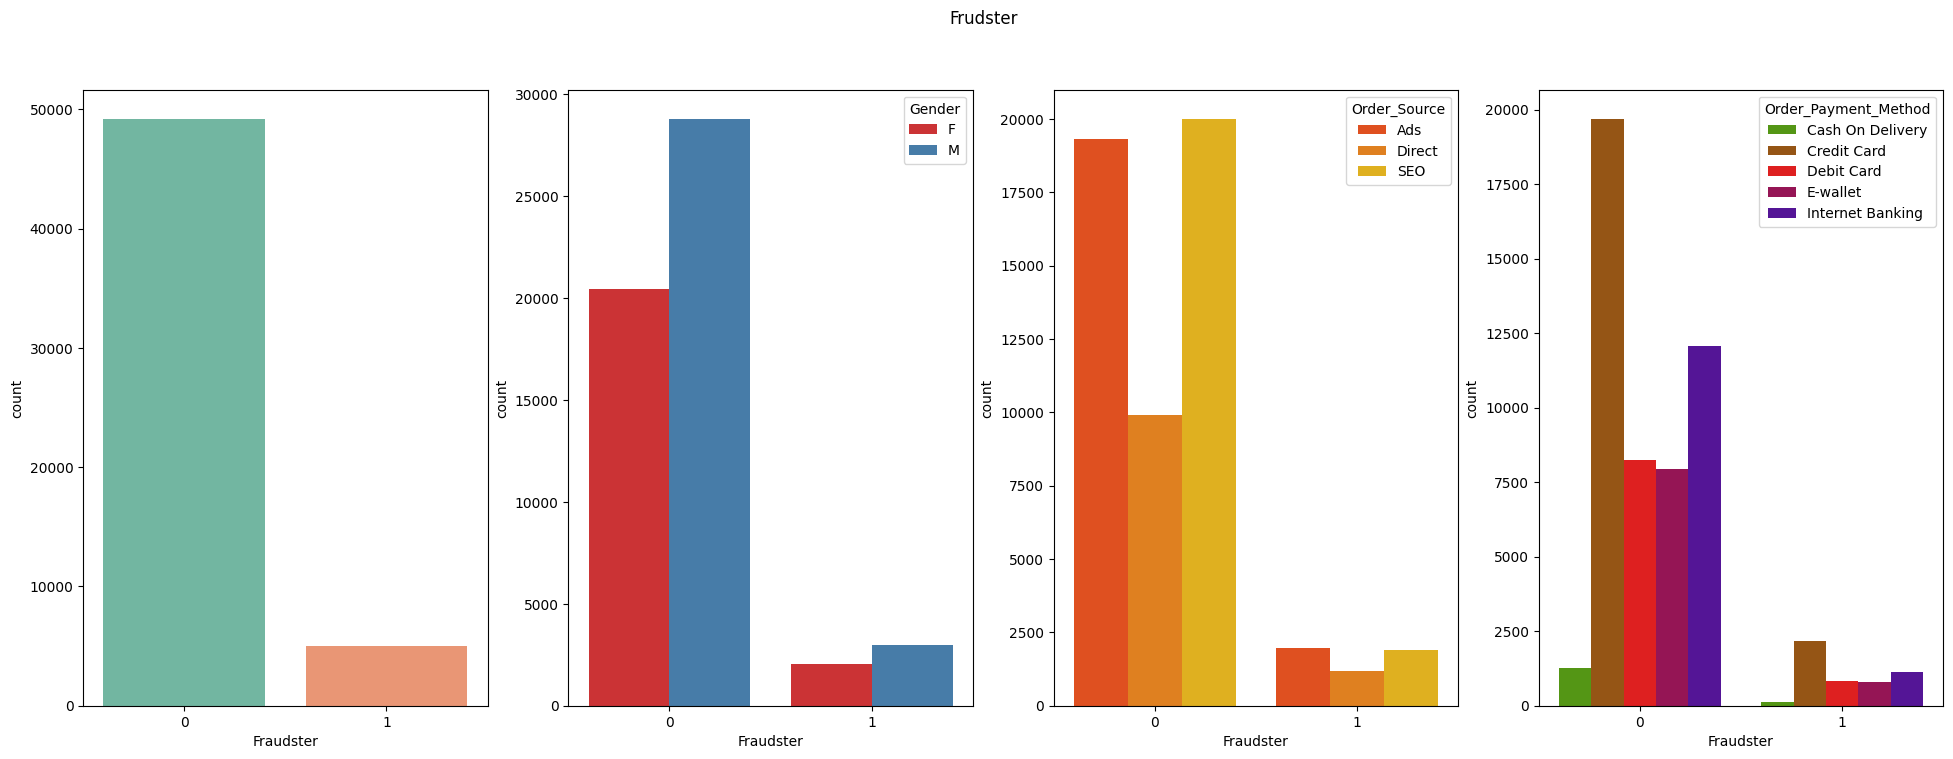

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle('Frudster')
sns.countplot(ax=axes[0], data=xyz_train, x='Fraudster', palette='Set2')
sns.countplot(ax=axes[1], data=xyz_train, x='Fraudster', hue='Gender', palette='Set1')
sns.countplot(ax=axes[2], data=xyz_train, x='Fraudster', hue='Order_Source', palette='autumn')
sns.countplot(ax=axes[3], data=xyz_train, x='Fraudster', hue='Order_Payment_Method', palette='brg_r')
plt.savefig('imgs/xyz_train[fraud,gender,ordsource,paymethod].jpg')

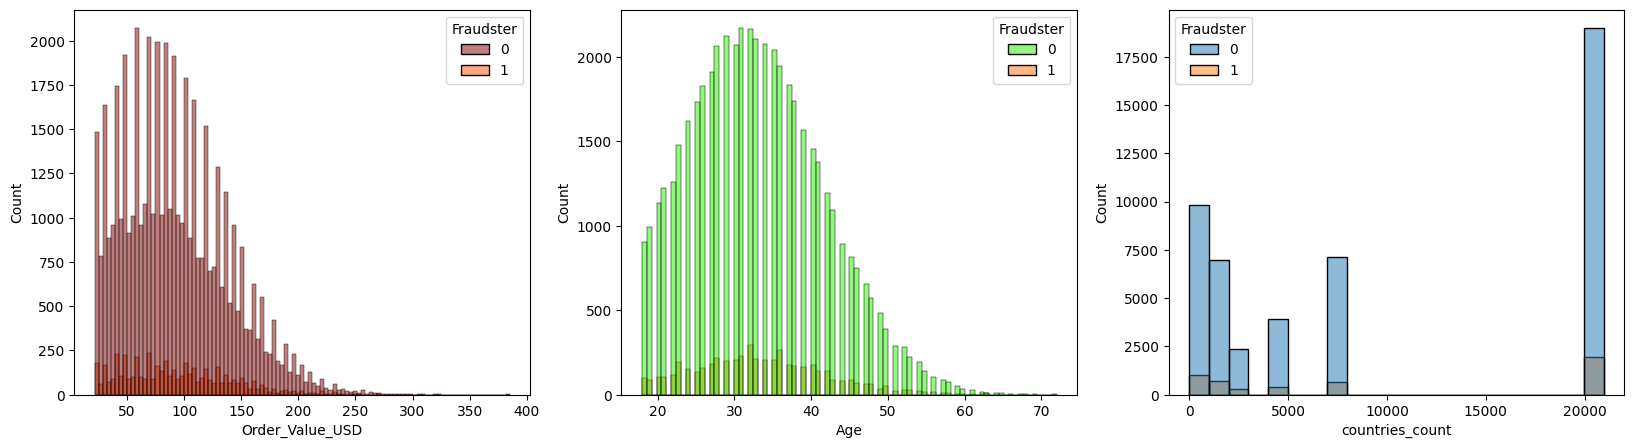

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(ax=axes[0], data=xyz_train, x='Order_Value_USD', hue='Fraudster', palette='gist_heat')
sns.histplot(ax=axes[1], data=xyz_train, x='Age',hue='Fraudster', palette='gist_ncar')
sns.histplot(ax=axes[2], data=xyz_train, x='countries_count', hue='Fraudster')
plt.savefig('imgs/xyz_train[ord_val_usd,age,countries_count].jpg')

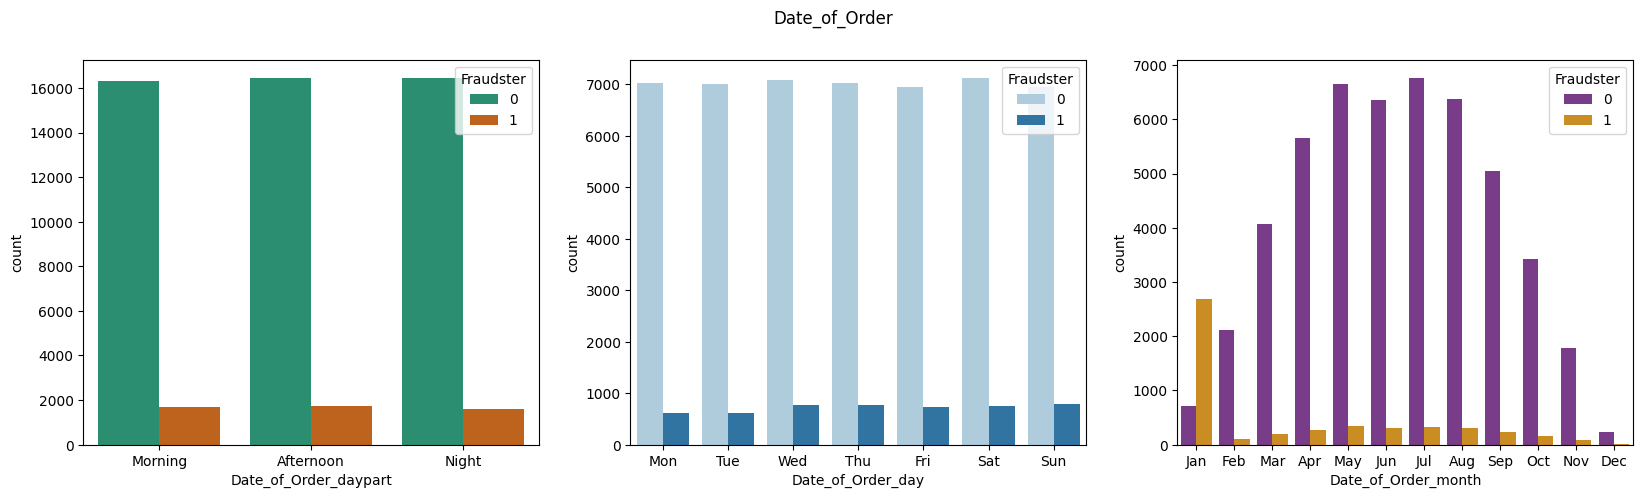

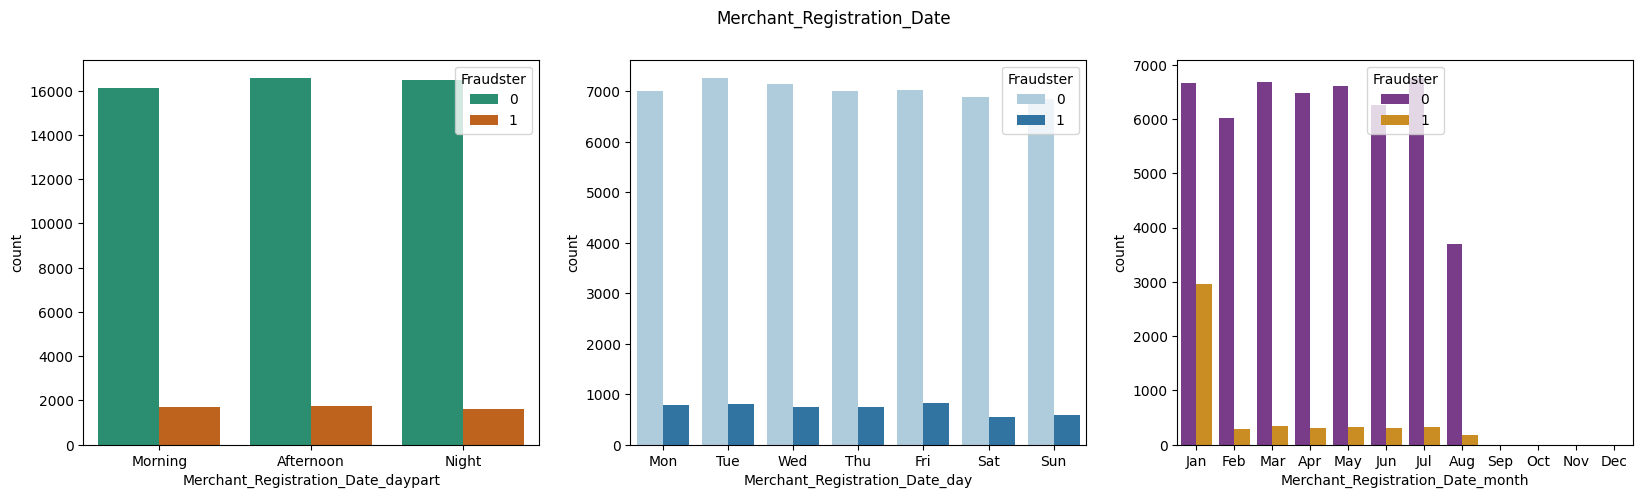

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Date_of_Order')
sns.countplot(ax=axes[0], data=xyz_train, x='Date_of_Order_daypart', hue='Fraudster', palette='Dark2',\
              order=['Morning','Afternoon','Night'])
sns.countplot(ax=axes[1], data=xyz_train, x='Date_of_Order_day', hue='Fraudster', palette='Paired',\
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(ax=axes[2], data=xyz_train, x='Date_of_Order_month', hue='Fraudster', palette='CMRmap',\
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
plt.savefig('imgs/xyz_train[ord(month,day,daypart)].jpg')


fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Merchant_Registration_Date')
sns.countplot(ax=axes[0], data=xyz_train,x='Merchant_Registration_Date_daypart', hue='Fraudster', palette='Dark2',\
              order=['Morning','Afternoon','Night'])
sns.countplot(ax=axes[1], data=xyz_train,x='Merchant_Registration_Date_day', hue='Fraudster', palette='Paired',\
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(ax=axes[2], data=xyz_train,x='Merchant_Registration_Date_month', hue='Fraudster', palette='CMRmap',\
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
plt.savefig('imgs/xyz_train[reg(month,day,daypart)].jpg')

<ipython-input-192-c8fb010632db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = xyz_train.corr())


<Axes: >

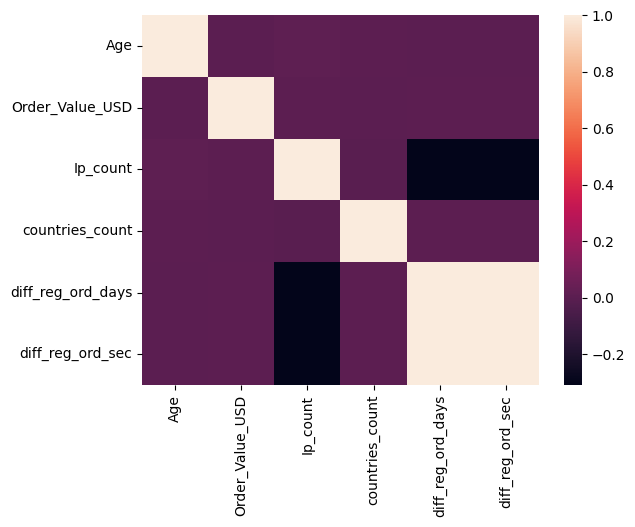

In [ ]:
sns.heatmap(data = xyz_train.corr())

# Fraud Analysis

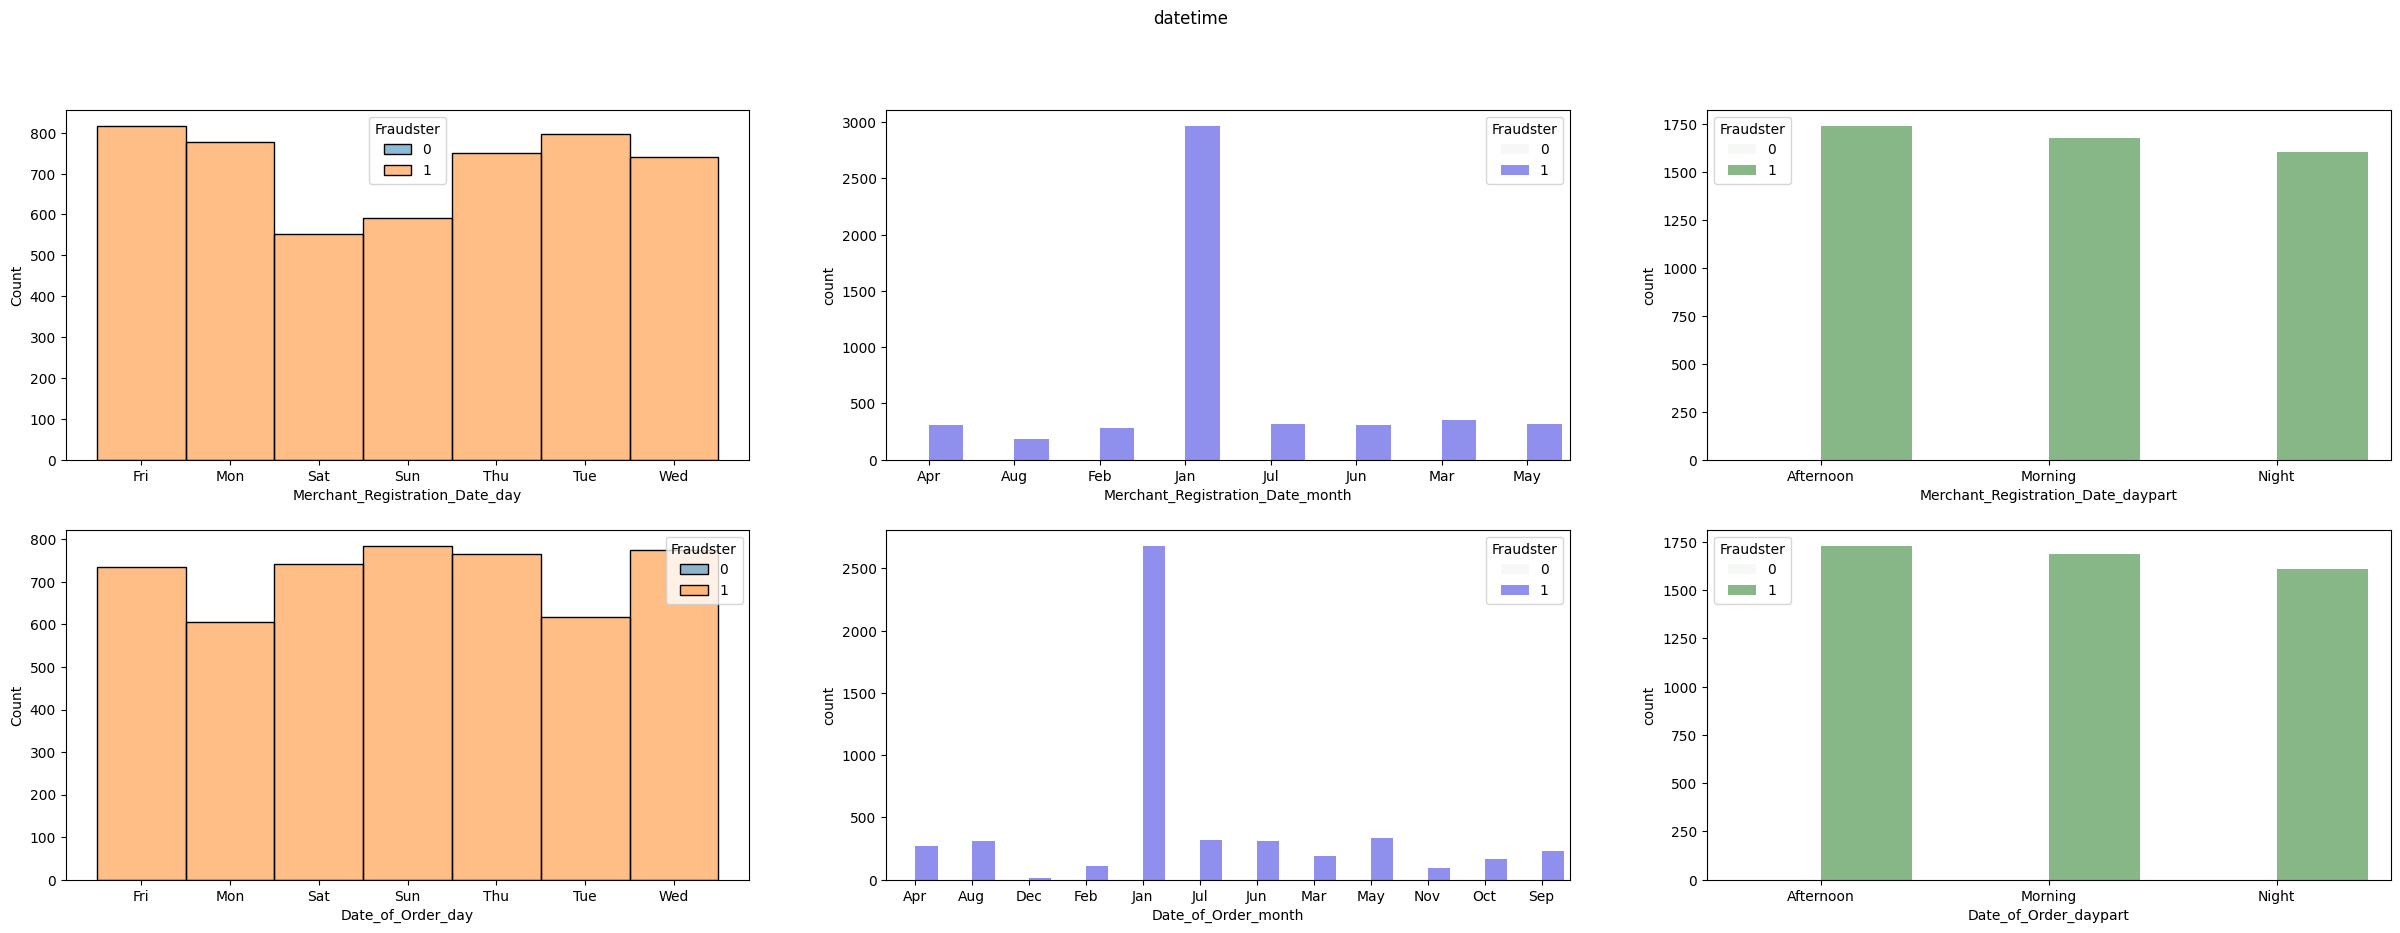

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
fig.suptitle('datetime')

sns.histplot(ax=axes[0,0], data=xyz_train[xyz_train['Fraudster']==1], x='Merchant_Registration_Date_day',hue='Fraudster', color='r',alpha=0.5)
sns.countplot(ax=axes[0,1], data=xyz_train[xyz_train['Fraudster']==1], x='Merchant_Registration_Date_month',hue='Fraudster', color='b',alpha=0.5)
sns.countplot(ax=axes[0,2], data=xyz_train[xyz_train['Fraudster']==1], x='Merchant_Registration_Date_daypart',hue='Fraudster', color='g',alpha=0.5)

sns.histplot(ax=axes[1,0], data=xyz_train[xyz_train['Fraudster']==1], x="Date_of_Order_day",hue='Fraudster',color='r',alpha=0.5)
sns.countplot(ax=axes[1,1], data=xyz_train[xyz_train['Fraudster']==1], x="Date_of_Order_month",hue='Fraudster',color='b',alpha=0.5)
sns.countplot(ax=axes[1,2], data=xyz_train[xyz_train['Fraudster']==1], x="Date_of_Order_daypart",hue='Fraudster',color='g',alpha=0.5)
plt.show()

In [ ]:
len(xyz_train.query('diff_reg_ord_days==2')),len(xyz_train.query('diff_reg_ord_sec==0')),len(xyz_train.query('diff_reg_ord_days==2 and diff_reg_ord_sec==0')),len(xyz_train.query('Fraudster==1'))

(3070, 2647, 2647, 5025)

# Non Hunch Data Analysis

In [ ]:
non_hunch_data = xyz_train[xyz_train['Ip_count']==1]

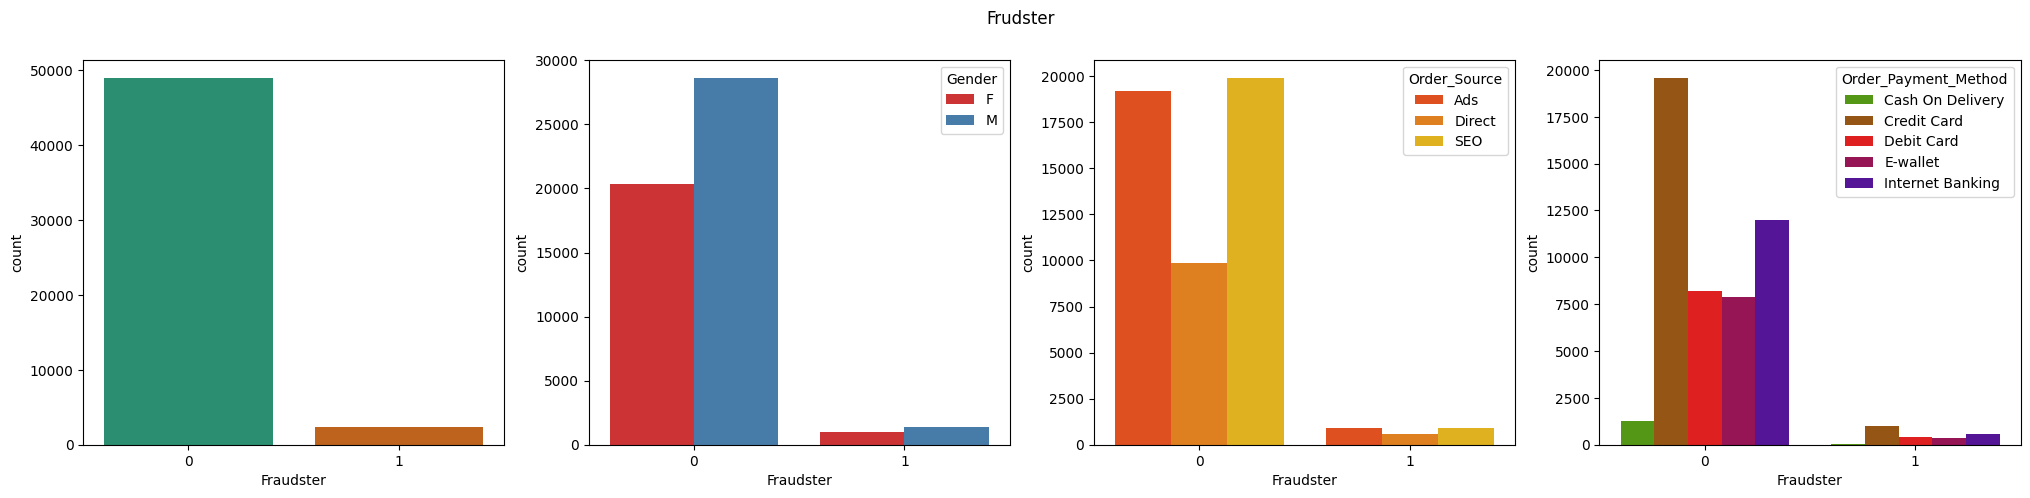

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Frudster')
sns.countplot(ax=axes[0], data=non_hunch_data, x='Fraudster', palette='Dark2')
sns.countplot(ax=axes[1], data=non_hunch_data, x='Fraudster', hue='Gender', palette='Set1')
sns.countplot(ax=axes[2], data=non_hunch_data, x='Fraudster', hue='Order_Source', palette='autumn')
sns.countplot(ax=axes[3], data=non_hunch_data, x='Fraudster', hue='Order_Payment_Method', palette="brg_r")
plt.savefig('imgs/non_hunch[gender,ordsource,paymethod].jpg')

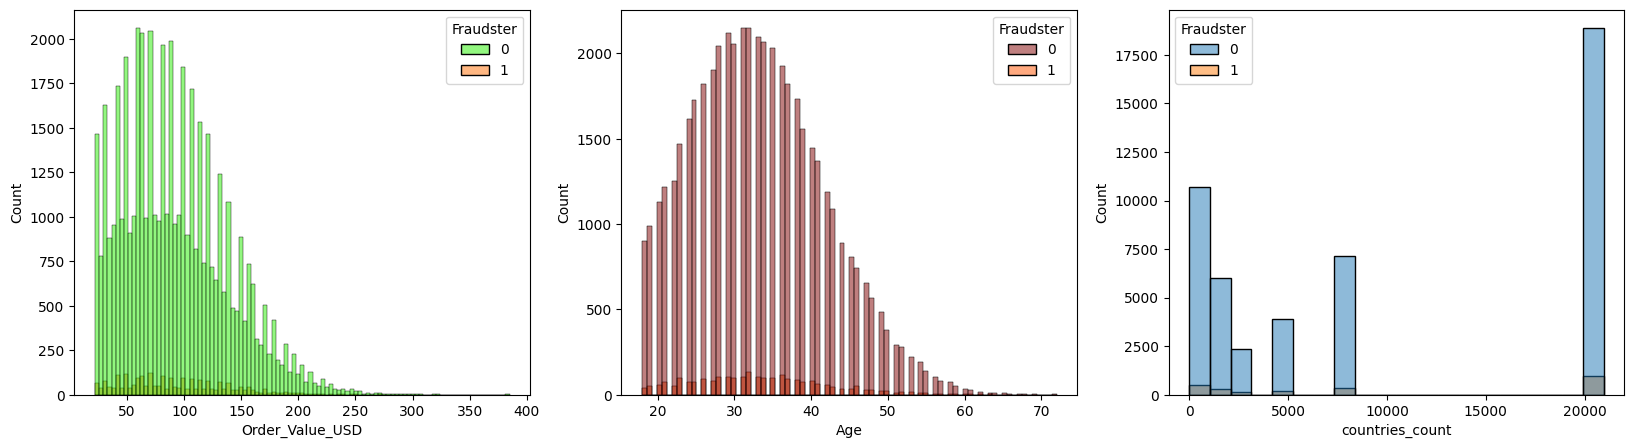

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(ax=axes[0], data=non_hunch_data, x='Order_Value_USD', hue='Fraudster', palette='gist_ncar')
sns.histplot(ax=axes[1], data=non_hunch_data, x='Age', hue='Fraudster', palette='gist_heat')
sns.histplot(ax=axes[2], data=non_hunch_data, x='countries_count', hue='Fraudster')
plt.savefig('imgs/non_hunch[Age,ord_val_usd,countries_count].jpg')

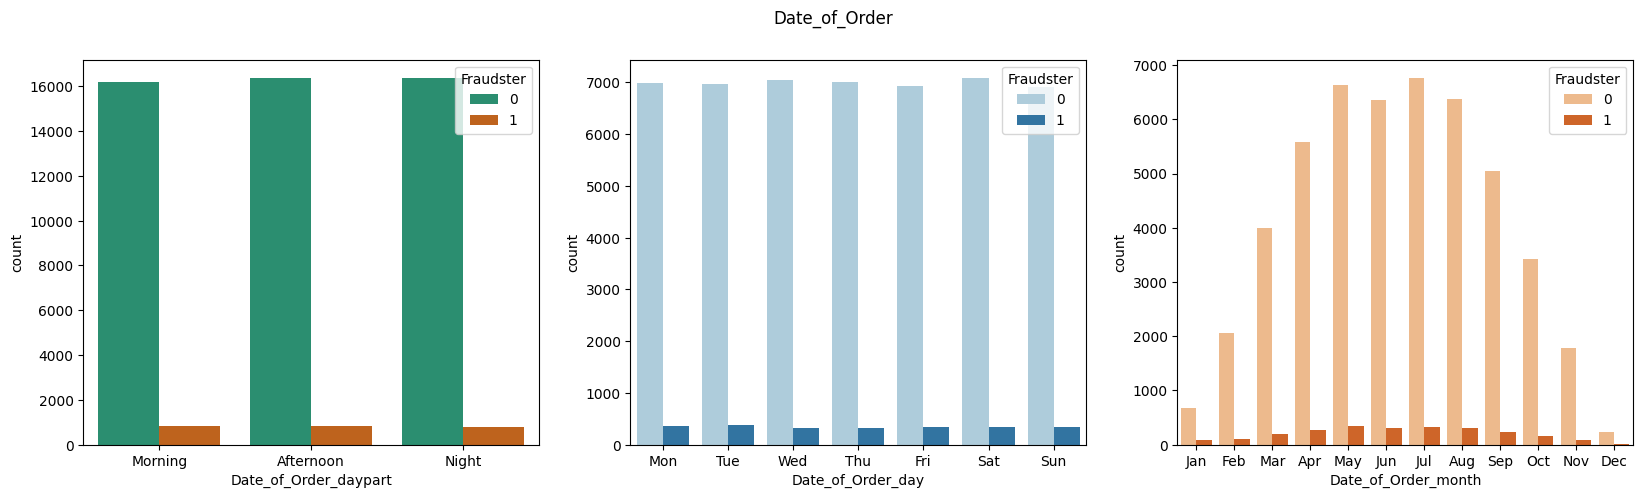

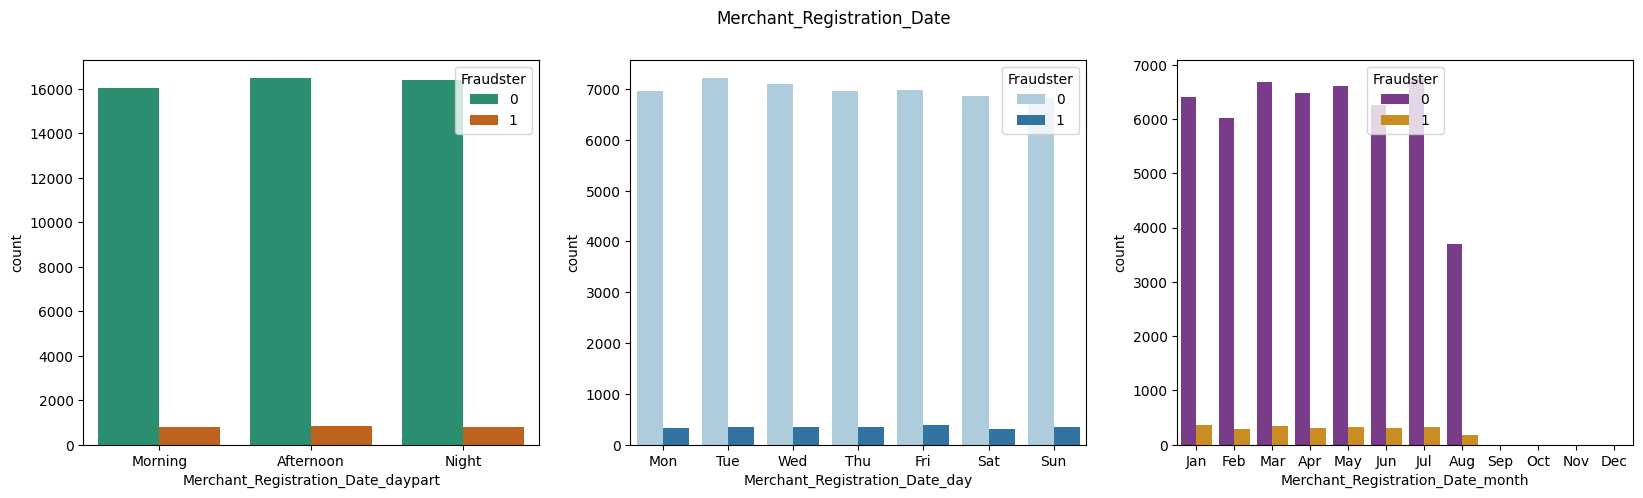

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Date_of_Order')
sns.countplot(ax=axes[0],data=non_hunch_data,x='Date_of_Order_daypart',hue='Fraudster', palette='Dark2',\
              order=['Morning','Afternoon','Night'])
sns.countplot(ax=axes[1],data=non_hunch_data,x='Date_of_Order_day',hue='Fraudster', palette='Paired',\
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(ax=axes[2],data=non_hunch_data,x='Date_of_Order_month',hue='Fraudster', palette='Oranges',\
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
plt.savefig('imgs/non_hunch[ord(month,day,daypart)].jpg')



fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Merchant_Registration_Date')
sns.countplot(ax=axes[0],data=non_hunch_data,x='Merchant_Registration_Date_daypart',hue='Fraudster', palette='Dark2',\
              order=['Morning','Afternoon','Night'])
sns.countplot(ax=axes[1],data=non_hunch_data,x='Merchant_Registration_Date_day',hue='Fraudster', palette='Paired',\
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(ax=axes[2],data=non_hunch_data,x='Merchant_Registration_Date_month',hue='Fraudster',  palette='CMRmap',\
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
plt.savefig('imgs/non_hunch[reg(month,day,daypart)].jpg')

# Hunch Data Analysis

In [ ]:
hunch_data = xyz_train[xyz_train['Ip_count']!=1]

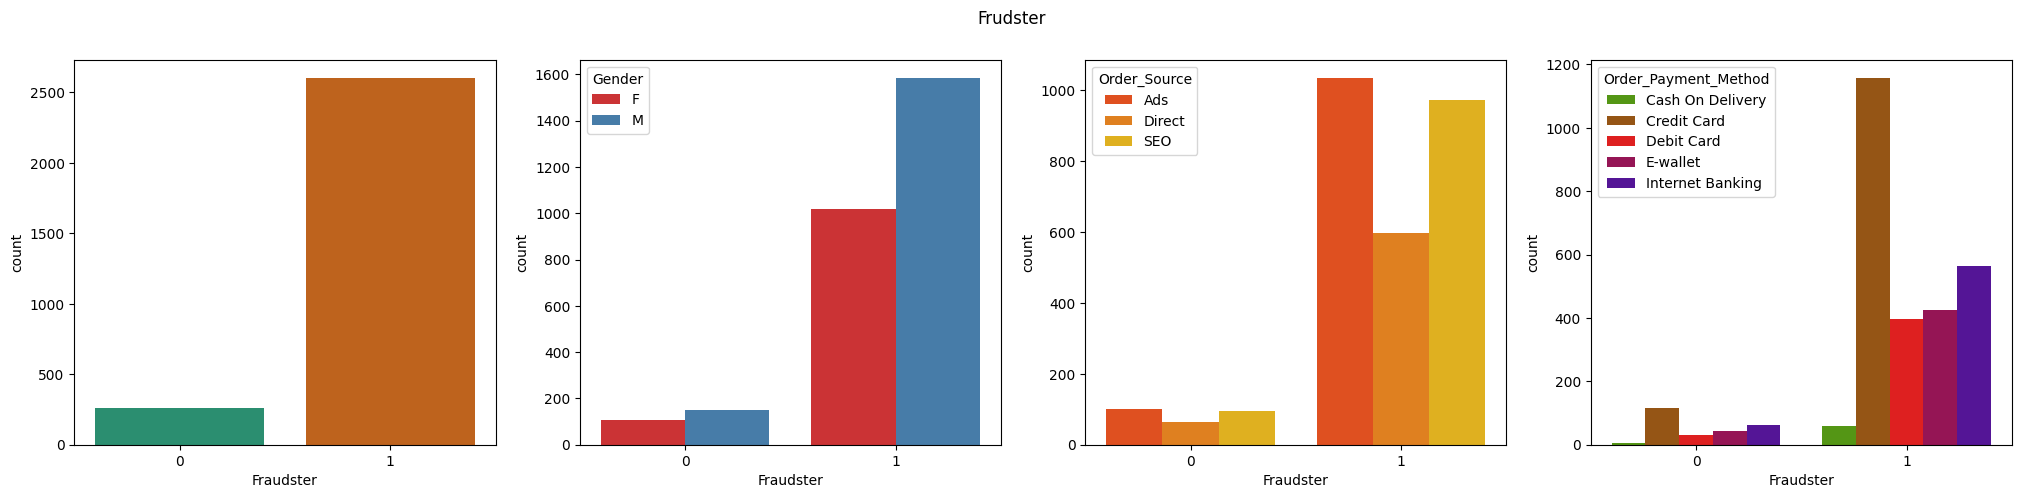

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

fig.suptitle('Frudster')
sns.countplot(ax=axes[0], data=hunch_data, x='Fraudster', palette='Dark2')
sns.countplot(ax=axes[1], data=hunch_data, x='Fraudster', hue='Gender', palette='Set1')
sns.countplot(ax=axes[2], data=hunch_data, x='Fraudster', hue='Order_Source', palette='autumn')
sns.countplot(ax=axes[3], data=hunch_data, x='Fraudster', hue='Order_Payment_Method', palette="brg_r")
plt.savefig('imgs/hunch[gender,ordsource,paymethod].jpg')

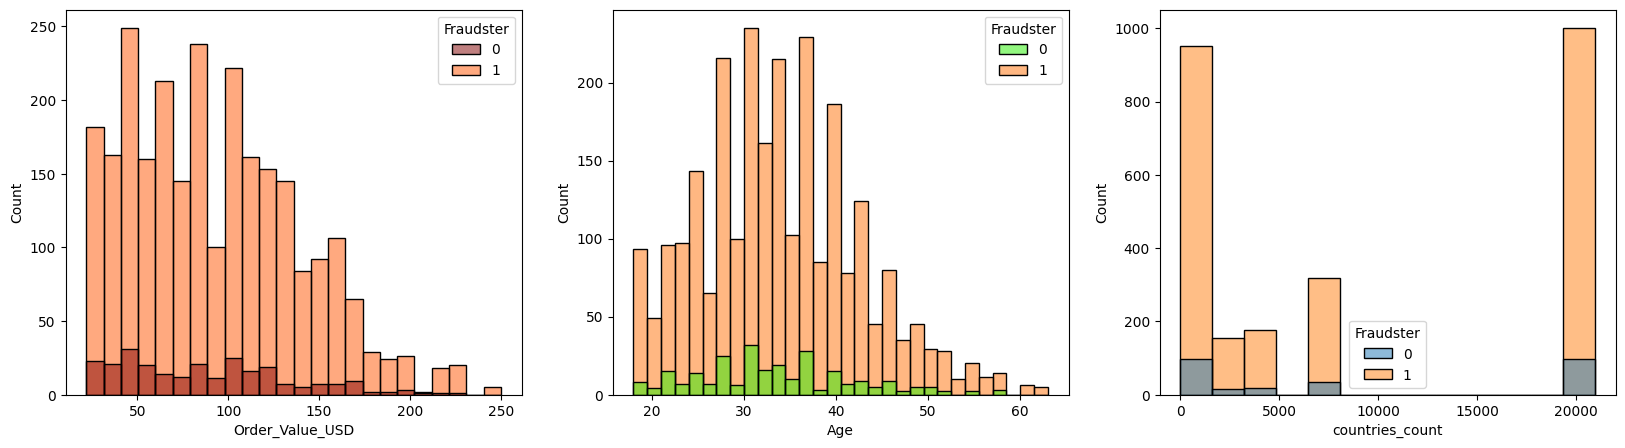

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(ax=axes[0], data=hunch_data, x='Order_Value_USD', hue='Fraudster', palette='gist_heat')
sns.histplot(ax=axes[1], data=hunch_data, x='Age', hue='Fraudster', palette='gist_ncar')
sns.histplot(ax=axes[2], data=hunch_data, x='countries_count', hue='Fraudster')
plt.savefig('imgs/hunch[Age,ord_val_usd,countries_count].jpg')

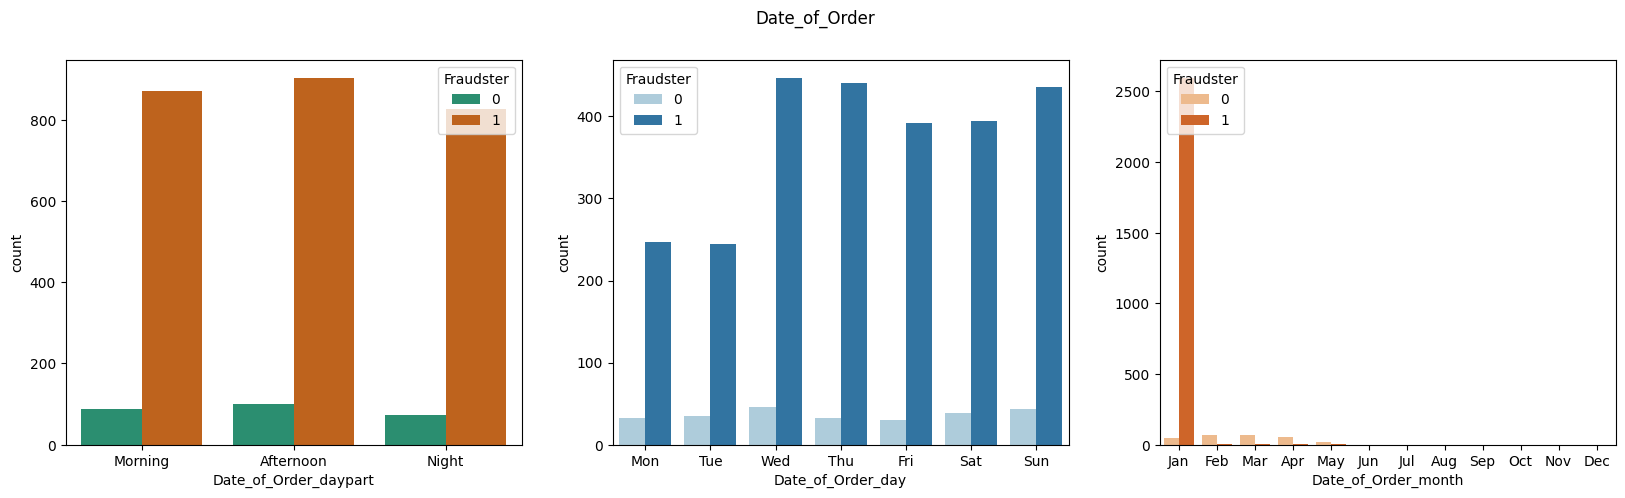

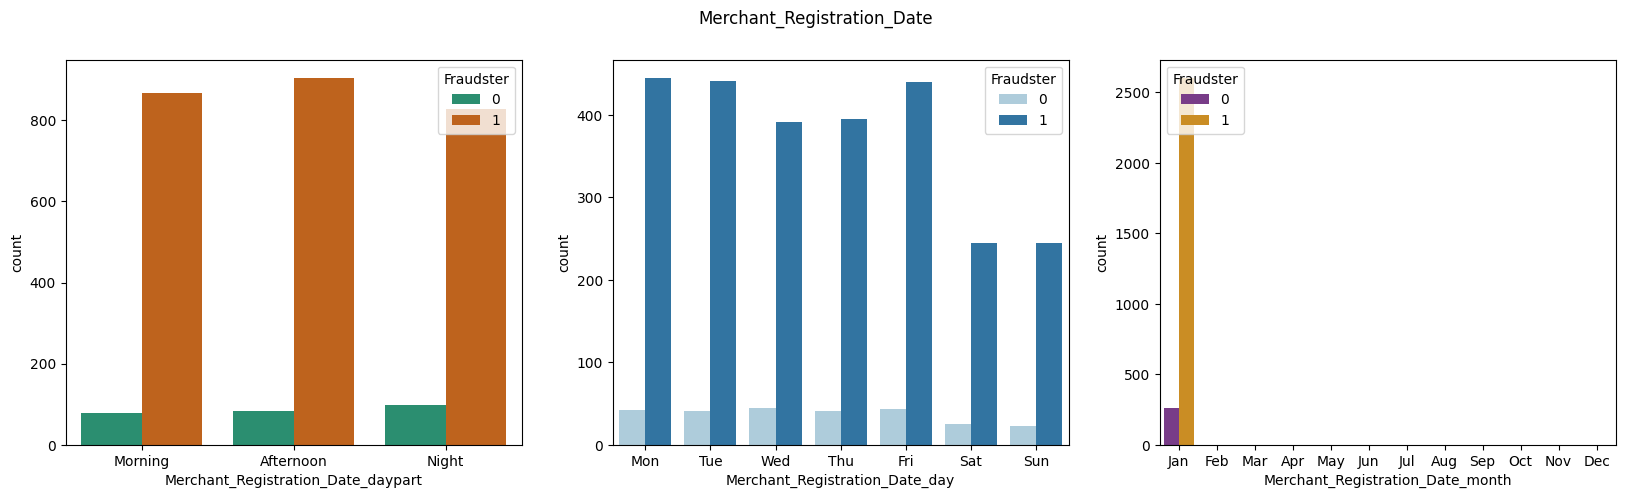

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Date_of_Order')
sns.countplot(ax=axes[0],data=hunch_data,x='Date_of_Order_daypart',hue='Fraudster', palette='Dark2',\
              order=['Morning','Afternoon','Night'])
sns.countplot(ax=axes[1],data=hunch_data,x='Date_of_Order_day',hue='Fraudster', palette='Paired',\
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(ax=axes[2],data=hunch_data,x='Date_of_Order_month',hue='Fraudster', palette='Oranges',\
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
plt.savefig('imgs/hunch[ord(month,day,daypart)].jpg')

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Merchant_Registration_Date')
sns.countplot(ax=axes[0],data=hunch_data,x='Merchant_Registration_Date_daypart',hue='Fraudster', palette='Dark2',\
              order=['Morning','Afternoon','Night'])
sns.countplot(ax=axes[1],data=hunch_data,x='Merchant_Registration_Date_day',hue='Fraudster', palette='Paired',\
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(ax=axes[2],data=hunch_data,x='Merchant_Registration_Date_month',hue='Fraudster',  palette='CMRmap',\
              order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
plt.savefig('imgs/hunch[reg(month,day,daypart)].webp')


# Train Test Split
# Handling imbalance by SMOTE
# strandadisation

In [ ]:
print(xyz_train.dtypes)
xyz_train.nunique()

Age                                      int64
Gender                                category
Order_Value_USD                          int64
Order_Source                          category
Order_Payment_Method                  category
Ip_count                                 int64
countries_count                          int64
Date_of_Order_daypart                 category
Date_of_Order_day                     category
Date_of_Order_month                   category
Merchant_Registration_Date_daypart    category
Merchant_Registration_Date_day        category
Merchant_Registration_Date_month      category
diff_reg_ord_days                        int64
diff_reg_ord_sec                       float64
Fraudster                             category
dtype: object


Age                                      53
Gender                                    2
Order_Value_USD                         116
Order_Source                              3
Order_Payment_Method                      5
Ip_count                                  9
countries_count                          84
Date_of_Order_daypart                     3
Date_of_Order_day                         7
Date_of_Order_month                      12
Merchant_Registration_Date_daypart        3
Merchant_Registration_Date_day            7
Merchant_Registration_Date_month          8
diff_reg_ord_days                       120
diff_reg_ord_sec                      51567
Fraudster                                 2
dtype: int64

In [ ]:
X = xyz_train.drop('Fraudster', axis=1)
y = xyz_train.drop([x for x in xyz_train.columns if x!='Fraudster'], axis=1)

In [ ]:
cat = list(X.select_dtypes('category'))
X= pd.get_dummies(data=X,columns=cat,drop_first = True)

In [ ]:
num = list(X.select_dtypes("int64"))
num

['Age', 'Order_Value_USD', 'Ip_count', 'countries_count', 'diff_reg_ord_days']

train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,Age,Order_Value_USD,Ip_count,countries_count,diff_reg_ord_days,diff_reg_ord_sec,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,...,Merchant_Registration_Date_day_Thu,Merchant_Registration_Date_day_Tue,Merchant_Registration_Date_day_Wed,Merchant_Registration_Date_month_Aug,Merchant_Registration_Date_month_Feb,Merchant_Registration_Date_month_Jan,Merchant_Registration_Date_month_Jul,Merchant_Registration_Date_month_Jun,Merchant_Registration_Date_month_Mar,Merchant_Registration_Date_month_May
13345,34,70,1,419,67,5633976.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4921,40,40,1,1138,101,8585730.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
25306,36,92,1,1096,66,5599086.0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
50641,27,135,1,4284,16,1261412.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
32206,31,175,1,177,48,4053234.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,46,80,1,164,57,4766651.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
44732,19,68,1,20963,100,8470724.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
38158,25,120,1,20963,88,7496371.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
860,39,58,1,657,93,7898883.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train[num] = scalar.fit_transform(X_train[num])

handling Imabalance by using SMOTE

In [ ]:
y_train.value_counts()

Fraudster
0            32938
1             3384
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

Fraudster
0            32938
1            32938
dtype: int64

# Model Building

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def eval(model_name,y_act,y_pred):
  print(model_name,"\n","_"*len(model_name)*3)
  print("accuracy: ",accuracy_score(y_act,y_pred))
  print("recall: ",recall_score(y_act,y_pred))
  print("precision: ",precision_score(y_act,y_pred))
  print("f1 score: ",f1_score(y_act,y_pred))
  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_act, y_pred), display_labels = [False, True])
  cm_display.plot()
  plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
lr_y_train_pred = lr_clf.predict(X_train)
lr_y_test_pred = lr_clf.predict(X_test)

Logistic Regression 
 _________________________________________________________
accuracy:  0.7600947234197584
recall:  0.5201894468395166
precision:  1.0
f1 score:  0.6843745007189646


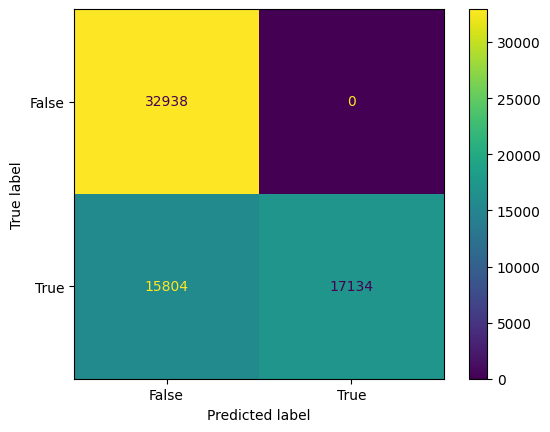

Logistic Regression 
 _________________________________________________________
accuracy:  0.9577441171538762
recall:  0.5393053016453382
precision:  1.0
f1 score:  0.7007125890736342


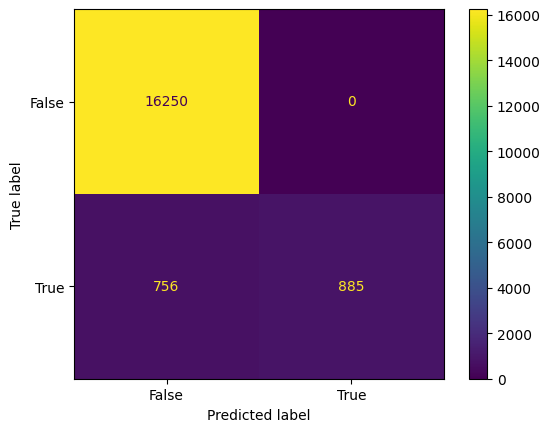

In [ ]:
eval("Logistic Regression",y_train,lr_y_train_pred)
eval("Logistic Regression",y_test,lr_y_test_pred)

Decission Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_clf_train_pred = dt_clf.predict(X_train)
dt_clf_test_pred = dt_clf.predict(X_test)

Decission Tree 
 __________________________________________
accuracy:  1.0
recall:  1.0
precision:  1.0
f1 score:  1.0


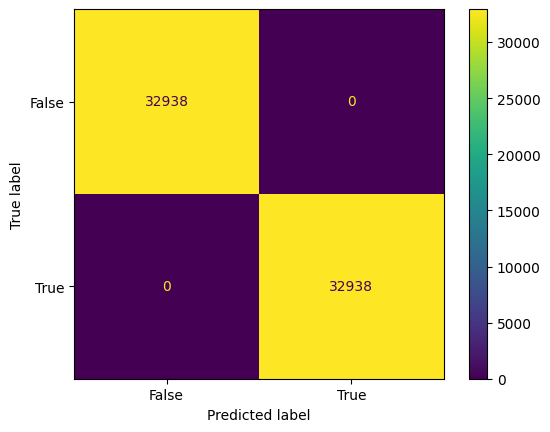

Decission Tree 
 __________________________________________
accuracy:  0.6675982337488122
recall:  0.7032297379646557
precision:  0.1744783791956456
f1 score:  0.27958812840702607


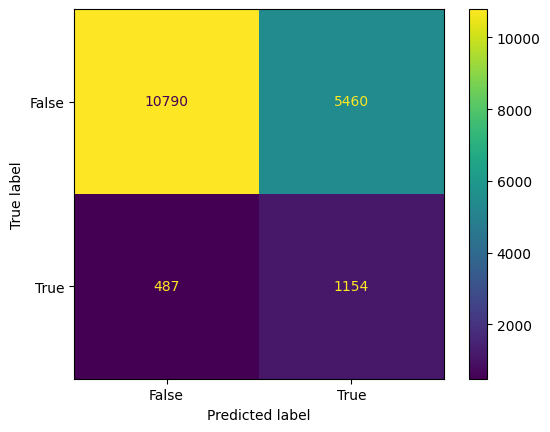

In [ ]:
eval("Decission Tree",y_train,dt_clf_train_pred)
eval("Decission Tree",y_test,dt_clf_test_pred)

In [ ]:
dt_clf_hy = DecisionTreeClassifier(random_state = 42)

In [ ]:
params = {
    "criterion":['gini','entropy'],
    "max_depth" : [15,20],
    "min_samples_leaf" : [1, 2,3],
    'max_features': ["auto","sqrt"],
    'min_samples_split': [2,3,4],
        }

In [ ]:
dt_clf_hy_grid = GridSearchCV(estimator=dt_clf_hy,
                           param_grid=params,
                           cv=4)

In [ ]:
dt_clf_hy_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
dt_clf_hy_grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dt_clf_y_train_pred = dt_clf_hy_grid.predict(X_train)
dt_clf_y_test_pred = dt_clf_hy_grid.predict(X_test)

Decission Tree Hyper parameters 
 _____________________________________________________________________________________________
accuracy:  0.9519096484303844
recall:  0.943105228004129
precision:  0.9600098893627542
f1 score:  0.9514824797843665


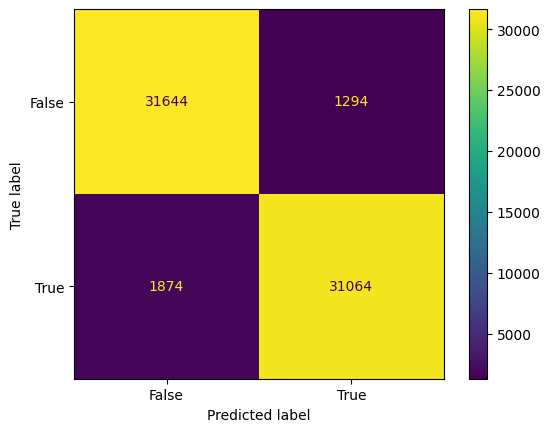

Decission Tree Hyper parameters 
 _____________________________________________________________________________________________
accuracy:  0.8769213571069253
recall:  0.5783059110298598
precision:  0.3859292395282635
f1 score:  0.4629268292682927


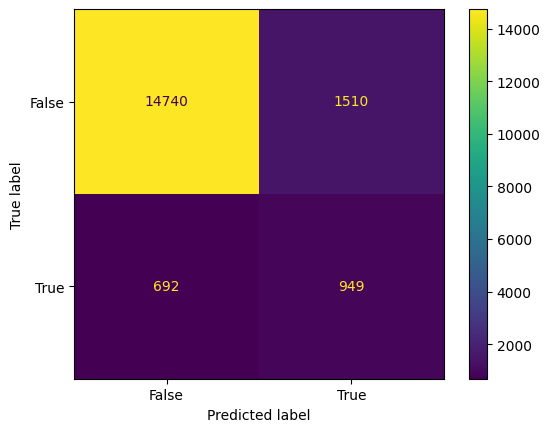

In [ ]:
eval("Decission Tree Hyper parameters",y_train,dt_clf_y_train_pred)
eval("Decission Tree Hyper parameters",y_test,dt_clf_y_test_pred)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)

In [ ]:
rnd_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
rnd_clf_test_pred = rnd_clf.predict(X_test)

Random Forest 
 _______________________________________
accuracy:  0.9553965681068693
recall:  0.5307739183424741
precision:  0.9688542825361512
f1 score:  0.6858267716535434


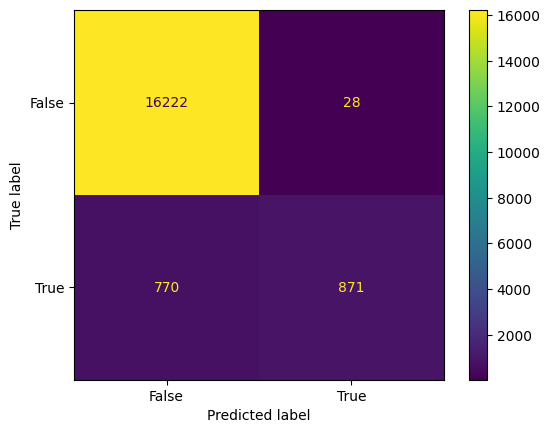

In [ ]:
eval("Random Forest",y_test,rnd_clf_test_pred)

RandomForest Hyperparameter

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf_hy = RandomForestClassifier(random_state=43)
params = {"criterion":['gini','entropy'],
              "n_estimators" : [200,300],
              "max_depth" : [15,20],
              "min_samples_leaf" : [1, 2,3]}

In [ ]:
rnd_clf_hy_grid = GridSearchCV(estimator=rnd_clf_hy,
                               param_grid=params,
                               cv=4,
                               n_jobs=-1)

In [ ]:
rnd_clf_hy_grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=43), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20], 'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [200, 300]})

In [ ]:
rnd_clf_hy_grid.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [ ]:
rnd_clf_hy_train_pred = rnd_clf_hy_grid.predict(X_train)
rnd_clf_hy_test_pred = rnd_clf_hy_grid.predict(X_test)

Random Forest Hyper parameters 
 __________________________________________________________________________________________
accuracy:  0.9940949663003218
recall:  0.9886453336571741
precision:  0.9995395807115013
f1 score:  0.9940626097043516


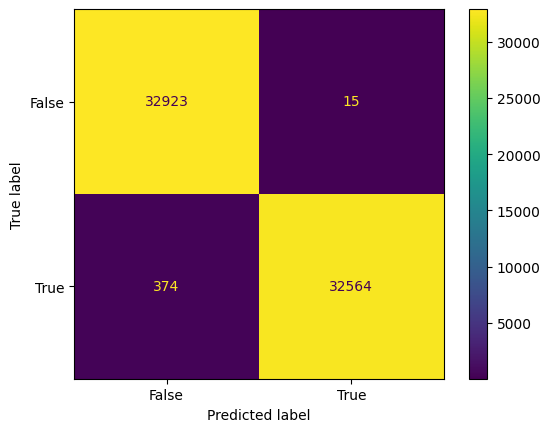

Random Forest Hyper parameters 
 __________________________________________________________________________________________
accuracy:  0.9546140517578671
recall:  0.5411334552102377
precision:  0.9376979936642027
f1 score:  0.6862442040185471


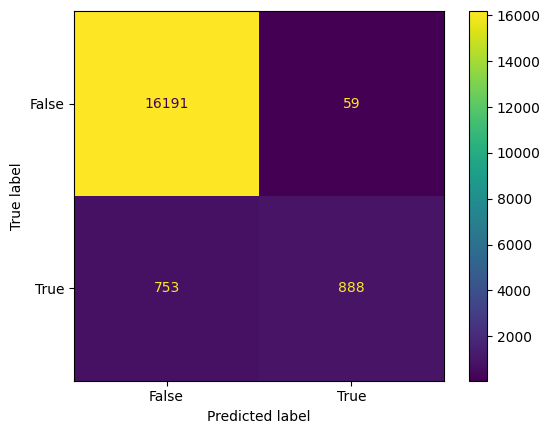

In [ ]:
eval("Random Forest Hyper parameters",y_train,rnd_clf_hy_train_pred)
eval("Random Forest Hyper parameters",y_test,rnd_clf_hy_test_pred)